In [78]:
'''
import tarfile
import os
podcast = tarfile.open('D:\spbu\podcast_wavs.tar.gz', 'r')
podcast.extractall()

crowd = tarfile.open('D:\spbu\crowd.tar', 'r')
crowd.extractall()

podcast_ = tarfile.open('D:\spbu\podcast.tar', 'r')
podcast_.extractall()
'''

"\nimport tarfile\nimport os\npodcast = tarfile.open('D:\\spbu\\podcast_wavs.tar.gz', 'r')\npodcast.extractall()\n\ncrowd = tarfile.open('D:\\spbu\\crowd.tar', 'r')\ncrowd.extractall()\n\npodcast_ = tarfile.open('D:\\spbu\\podcast.tar', 'r')\npodcast_.extractall()\n"

Pydub, Librosa
 - мел-частотные кепстральные коэффициенты (MFCC)
 - вектор цветности
 - мел-спектрограмма
 - спектральный контраст
 - тональный центроид (Tonnetz)

In [79]:
import torch
import numpy as np
import pandas as pd
import scipy
import librosa
import os 
import librosa.display as ld
import matplotlib.pyplot as plt
import IPython

l = "D:/spbu/"
crowd_test=pd.read_csv("crowd_test/raw_crowd_test.tsv",sep='\t')
crowd_train=pd.read_csv("crowd_train/raw_crowd_train.tsv",sep='\t')

podcast_test=pd.read_csv("podcast_test/raw_podcast_test.tsv",sep='\t')
podcast_train=pd.read_csv("podcast_train/raw_podcast_train.tsv",sep='\t')


path_podc_test = "podcast_test/"
path_podc_train = "podcast_train/"
path_crowd_test = "crowd_test/"
path_crowd_train = "crowd_train/"


print(crowd_train['annotator_emo'].unique())

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
audio_file = path_crowd_train + crowd_train['audio_path'][184632]
signal, sr = librosa.load(audio_file)
display(IPython.display.Audio(signal, rate = sr))

## просто приколюхи - характеристики

In [ ]:

audio_file = path_crowd_train + crowd_train['audio_path'][0]
signal, sr = librosa.load(audio_file)
print(signal, sr)


[-9.7350530e-11  5.8569460e-10 -7.0139761e-09 ... -4.1072275e-03
 -3.9070398e-03 -1.7003519e-03] 22050


In [ ]:

n_fft = 2048
ft = np.abs(librosa.stft(signal[:n_fft], hop_length = n_fft+1))
plt.plot(ft)
plt.title('Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')


Text(101.09722222222221, 0.5, 'Amplitude')

In [ ]:
X = librosa.stft(signal)
s = librosa.amplitude_to_db(abs(X))
ld.specshow(s, sr=sr, x_axis = 'time', y_axis='linear')
plt.colorbar()

In [ ]:
mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc = 40, hop_length=512)
mfccs

array([[-257.34512  , -127.59514  , -135.21623  , ..., -486.09662  ,
        -482.89682  , -479.53137  ],
       [  32.36355  ,   70.560455 ,   77.98036  , ...,   67.93624  ,
          84.7332   ,   87.01981  ],
       [ -37.807976 ,  -45.13635  ,  -39.576393 , ...,   35.326103 ,
          32.225174 ,   27.144756 ],
       ...,
       [  -2.1360872,   -2.557101 ,   -2.448905 , ...,    9.766022 ,
          12.376335 ,   10.682306 ],
       [   2.4782622,    5.1392226,    4.6999702, ...,    9.44579  ,
          12.2339325,    9.749405 ],
       [  -2.2276092,   -4.0216646,   -4.494809 , ...,    5.3182726,
           7.6747904,   10.035411 ]], dtype=float32)

In [ ]:
melspectrum = librosa.feature.melspectrogram(y=signal, sr = sr,
                                        	hop_length =512, n_mels = 40)


### Спектральный центроид (Spectral Centroid)

In [ ]:
cent = librosa.feature.spectral_centroid(y=signal, sr=sr)
plt.figure(figsize=(15,5))
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.legend()

### Спектральный спад  (Spectral Rolloff)

In [ ]:
rolloff = librosa.feature.spectral_rolloff(y=signal, sr=sr)
plt.figure(figsize=(15,5))
plt.semilogy(rolloff.T, label='Roll-off frequency')
plt.ylabel('Hz')
plt.legend()

Pydub, Librosa
 - мел-частотные кепстральные коэффициенты (MFCC)
 - вектор цветности
 - мел-спектрограмма
 - спектральный контраст
 - тональный центроид (Tonnetz)

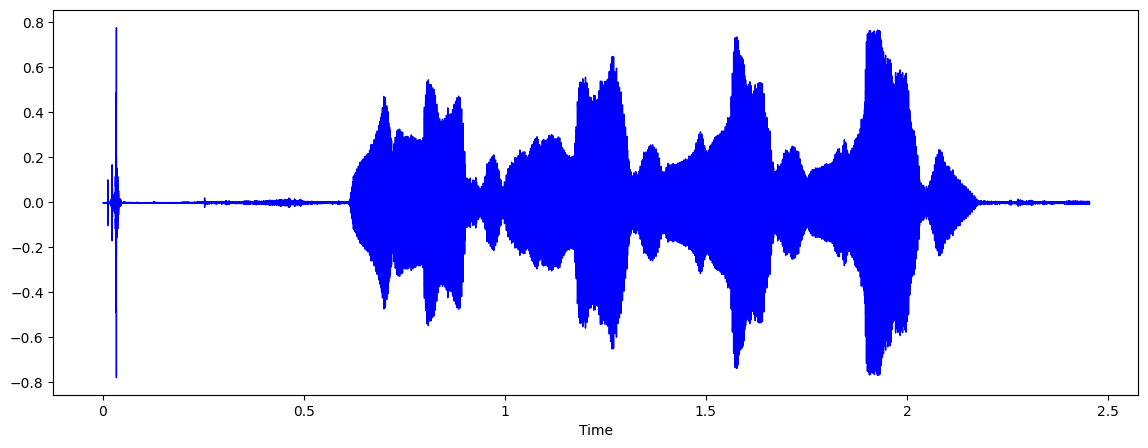

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(signal,  color="blue")
plt.show()
#wave(signal, sr, crowd_train['annotator_emo'][0])

Разделение гармонических (тональных ) и ударных (переходных) сигналов на две формы волны:

angry


Text(0.5, 1.0, 'Harmonic + Percussive')

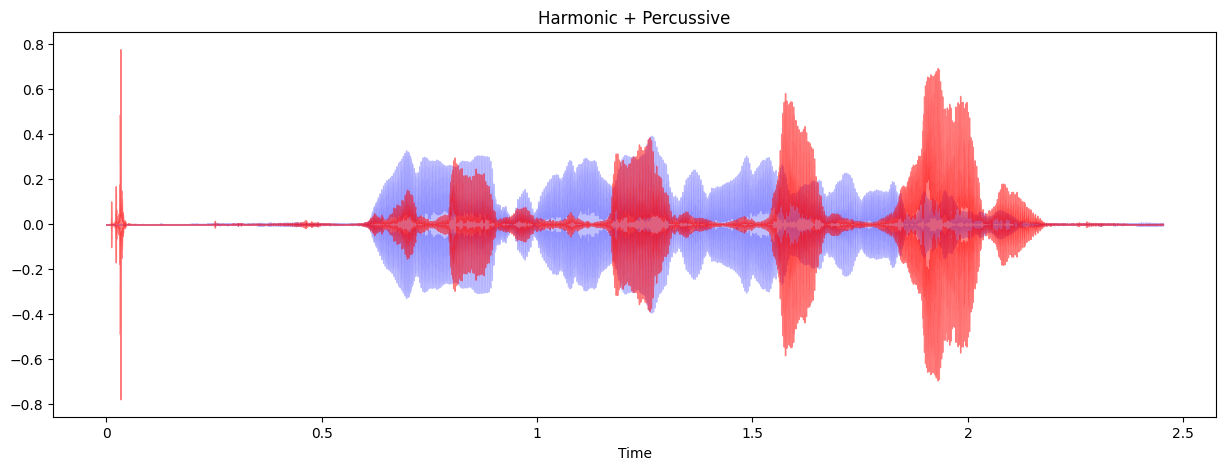

In [ ]:
y_harmonic, y_percussive = librosa.effects.hpss(signal)
plt.figure(figsize=(15, 5))

print(crowd_train['annotator_emo'][0])
librosa.display.waveshow(y_harmonic,  sr=sr, alpha=0.25, color='blue')
librosa.display.waveshow(y_percussive, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive')

neutral
[ 0.          0.          0.         ... -0.00231753 -0.00330754
 -0.00121733] 22050


Text(0.5, 1.0, 'Harmonic + Percussive')

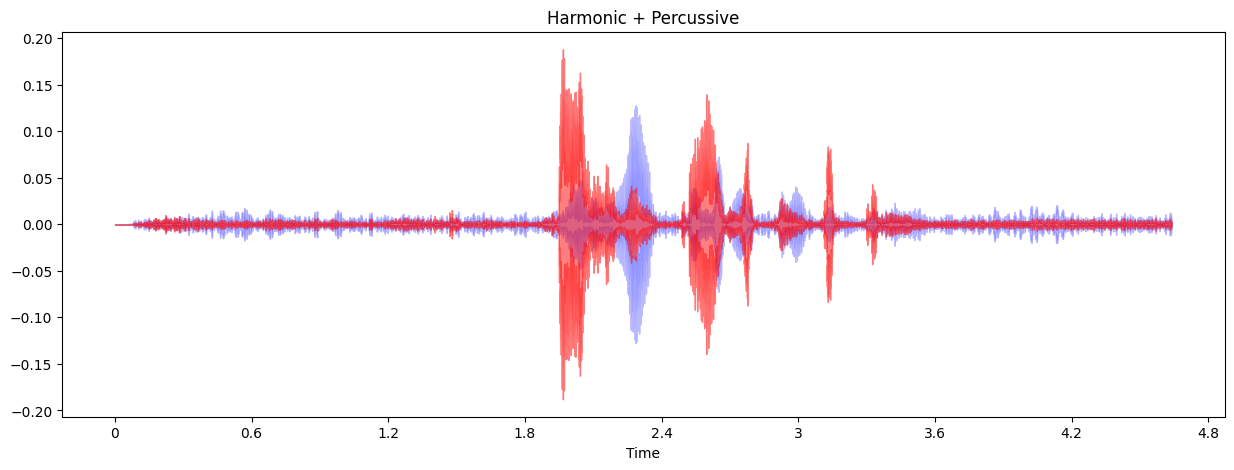

In [ ]:
audio_file = path_crowd_train + crowd_train['audio_path'][1]
signal, sr = librosa.load(audio_file)
print(crowd_train['annotator_emo'][1])
print(signal, sr)

y_harmonic, y_percussive = librosa.effects.hpss(signal)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y_harmonic,  sr=sr, alpha=0.25, color='blue')
librosa.display.waveshow(y_percussive, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive')

positive
[-7.9028212e-07 -2.2398763e-05 -3.5234225e-05 ... -7.2287585e-05
 -2.9233377e-05  2.4270541e-05] 22050


Text(0.5, 1.0, 'Harmonic + Percussive')

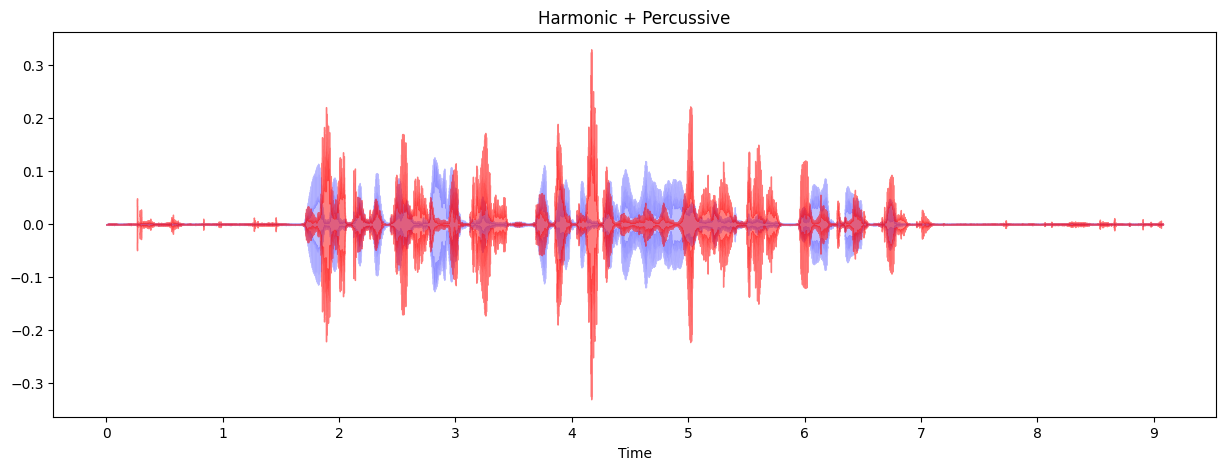

In [ ]:
audio_file = path_crowd_train + crowd_train['audio_path'][16]
signal, sr = librosa.load(audio_file)
print(crowd_train['annotator_emo'][16])
print(signal, sr)

y_harmonic, y_percussive = librosa.effects.hpss(signal)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y_harmonic,  sr=sr, alpha=0.25, color='blue')
librosa.display.waveshow(y_percussive, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive')

sad
[0.         0.         0.         ... 0.00353111 0.00438622 0.00293693] 22050


Text(0.5, 1.0, 'Harmonic + Percussive')

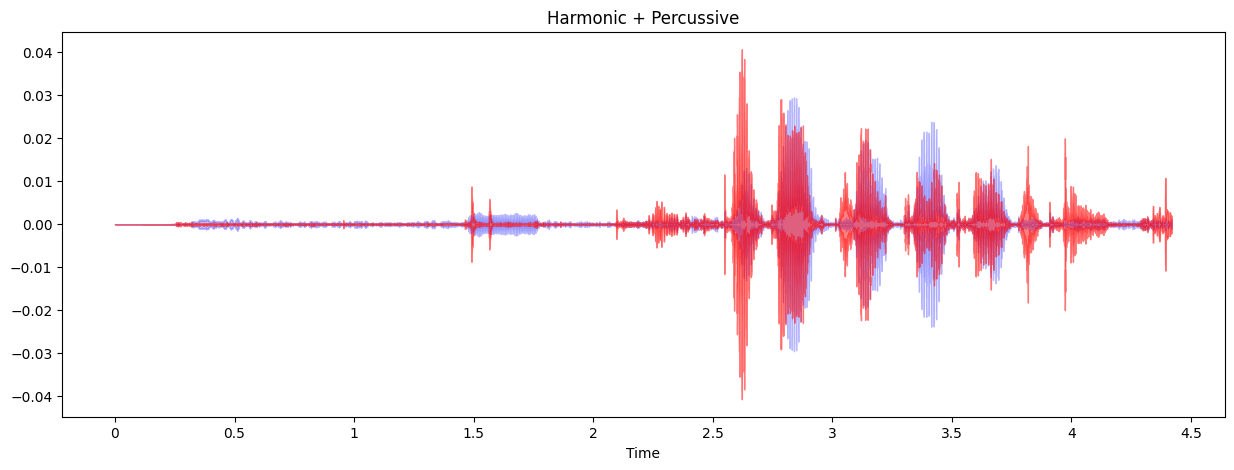

In [ ]:
audio_file = path_crowd_train + crowd_train['audio_path'][18]
signal, sr = librosa.load(audio_file)
print(crowd_train['annotator_emo'][18])
print(signal, sr)

y_harmonic, y_percussive = librosa.effects.hpss(signal)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y_harmonic,  sr=sr, alpha=0.25, color='blue')
librosa.display.waveshow(y_percussive, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive')

 спектрограмма аудиосигнала

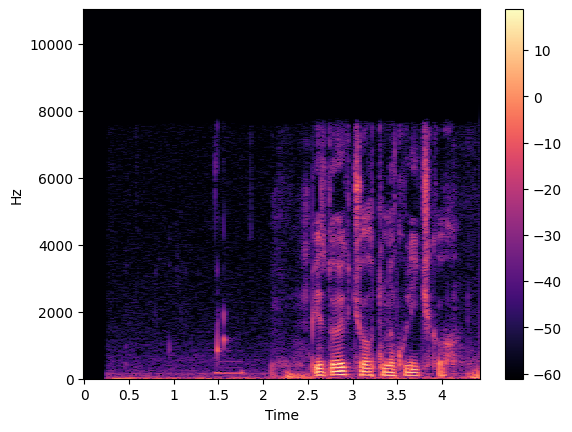

In [ ]:
X = librosa.stft(signal)
s = librosa.amplitude_to_db(abs(X))
ld.specshow(s, sr=sr, x_axis = 'time', y_axis='linear')
plt.colorbar()

# Обработка звука и извлечение характеристик

In [ ]:
import torch
import numpy as np
import pandas as pd
import scipy
import librosa
import os 
import librosa.display as ld
import matplotlib.pyplot as plt
import IPython

l = "D:/spbu/"
crowd_test=pd.read_csv("crowd_test/raw_crowd_test.tsv",sep='\t')
crowd_train=pd.read_csv("crowd_train/raw_crowd_train.tsv",sep='\t')

podcast_test=pd.read_csv("podcast_test/raw_podcast_test.tsv",sep='\t')
podcast_train=pd.read_csv("podcast_train/raw_podcast_train.tsv",sep='\t')


path_podc_test = "podcast_test/"
path_podc_train = "podcast_train/"
path_crowd_test = "crowd_test/"
path_crowd_train = "crowd_train/"


print(crowd_train['annotator_emo'].unique())

['angry' 'neutral' 'other' 'positive' 'sad']


In [ ]:
len(crowd_train[crowd_train['duration'] > 5])

292947

In [ ]:
crowd_train.describe(include = object)

,hash_id,audio_path,annotator_emo,annotator_id,speaker_text,speaker_emo,source_id
count,906953,906953,906953,906953,829176,829176,829176
unique,184633,184633,5,2732,124568,4,1877
top,11675ab24a0d0ce8e0daa859c941d764,wavs/11675ab24a0d0ce8e0daa859c941d764.wav,neutral,245a60194a54f962228e89e03b216384,включи нам сказку о звездном мальчике,neutral,8fdd37d08a1edd4c3f05f3df1e1d4a8d
freq,134,134,559501,5870,64,340649,3427


In [ ]:
crowd_test.drop(['annotator_id', 'speaker_emo', 'source_id', 'golden_emo'], axis= 1 , inplace= True )
crowd_train.drop(['annotator_id', 'speaker_emo', 'source_id', 'golden_emo'], axis= 1 , inplace= True )
podcast_train.drop(['annotator_id', 'speaker_emo', 'source_id', 'golden_emo'], axis= 1 , inplace= True )
podcast_test.drop(['annotator_id', 'speaker_emo', 'source_id', 'golden_emo'], axis= 1 , inplace= True )

In [ ]:
crowd_test.drop_duplicates(inplace=True, subset=['hash_id', 'audio_path'])
crowd_train.drop_duplicates(inplace=True, subset=['hash_id', 'audio_path'])
podcast_train.drop_duplicates(inplace=True, subset=['hash_id', 'audio_path'])
podcast_test.drop_duplicates(inplace=True, subset=['hash_id', 'audio_path'])


In [ ]:
crowd_test.reset_index(drop= True , inplace= True )
crowd_train.reset_index(drop= True , inplace= True )
podcast_train.reset_index(drop= True , inplace= True )
podcast_test.reset_index(drop= True , inplace= True )

In [ ]:
crowd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184633 entries, 0 to 184632
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   hash_id        184633 non-null  object 
 1   audio_path     184633 non-null  object 
 2   duration       184633 non-null  float64
 3   annotator_emo  184633 non-null  object 
 4   speaker_text   183055 non-null  object 
dtypes: float64(1), object(4)
memory usage: 7.0+ MB


In [ ]:
'''
podcast_train_ = podcast_train[podcast_train.annotator_emo != "neutral"]
podcast_train_.reset_index(drop= True , inplace= True )
'''

'\npodcast_train_ = podcast_train[podcast_train.annotator_emo != "neutral"]\npodcast_train_.reset_index(drop= True , inplace= True )\n'

In [ ]:

'''
podcast_train_data = pd.DataFrame(columns=['annotator_emo', 'duration', 'mfccs_feature', 'cent_mean', 'contrast'])
i=0
for index,audio_path in enumerate(podcast_train_.audio_path):
    path = path_podc_train + podcast_train_['audio_path'][i]
    print(i, path)
    X, sample_rate = librosa.load(path)
    sample_rate = np.array(sample_rate)
   
    mfccs = [np.mean(e) for e in librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=20)]
    
    cent_mean = np.mean(librosa.feature.spectral_centroid(y=X, sr=sample_rate).T,
                            axis = 0)[0]
    contrast = np.mean(librosa.feature.spectral_contrast(y=X, sr=sample_rate).T,
                            axis = 0)[0]
    #tonnetz = np.mean(librosa.feature.tonnetz(y=X, sr=sample_rate),axis = 0)
    #np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr).T, axis = 0)[0])      # rolloff_mean
    
    podcast_train_data.loc[i] = [podcast_train_['annotator_emo'][i]] + [podcast_train_['duration'][i]] + [mfccs]+ [np.array(cent_mean)] + [np.array(contrast)]
    
    i=i+1 
'''

"\npodcast_train_data = pd.DataFrame(columns=['annotator_emo', 'duration', 'mfccs_feature', 'cent_mean', 'contrast'])\ni=0\nfor index,audio_path in enumerate(podcast_train_.audio_path):\n    path = path_podc_train + podcast_train_['audio_path'][i]\n    print(i, path)\n    X, sample_rate = librosa.load(path)\n    sample_rate = np.array(sample_rate)\n   \n    mfccs = [np.mean(e) for e in librosa.feature.mfcc(y=X, \n                                        sr=sample_rate, \n                                        n_mfcc=20)]\n    \n    cent_mean = np.mean(librosa.feature.spectral_centroid(y=X, sr=sample_rate).T,\n                            axis = 0)[0]\n    contrast = np.mean(librosa.feature.spectral_contrast(y=X, sr=sample_rate).T,\n                            axis = 0)[0]\n    #tonnetz = np.mean(librosa.feature.tonnetz(y=X, sr=sample_rate),axis = 0)\n    #np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr).T, axis = 0)[0])      # rolloff_mean\n    \n    podcast_train_data.loc[i] = [pod

In [ ]:
'''
podcast_test_data = pd.DataFrame(columns=['annotator_emo', 'duration', 'mfccs_feature', 'cent_mean', 'contrast'])
i=0
for index,audio_path in enumerate(podcast_test.audio_path):
    path = path_podc_test + podcast_test['audio_path'][i]
    print(i, path)
    X, sample_rate = librosa.load(path)
    sample_rate = np.array(sample_rate)
    
    mfccs = [np.mean(e) for e in librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=20)]
    
    cent_mean = np.mean(librosa.feature.spectral_centroid(y=X, sr=sample_rate).T,
                            axis = 0)[0]
    contrast = np.mean(librosa.feature.spectral_contrast(y=X, sr=sample_rate).T,
                            axis = 0)[0]
    #tonnetz = np.mean(librosa.feature.tonnetz(y=X, sr=sample_rate),axis = 0)
    #np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr).T, axis = 0)[0])      # rolloff_mean
    
    podcast_test_data.loc[i] = [podcast_test['annotator_emo'][i]] + [podcast_test['duration'][i]] + [mfccs]+ [np.array(cent_mean)] + [np.array(contrast)]
    
    i=i+1 
'''

"\npodcast_test_data = pd.DataFrame(columns=['annotator_emo', 'duration', 'mfccs_feature', 'cent_mean', 'contrast'])\ni=0\nfor index,audio_path in enumerate(podcast_test.audio_path):\n    path = path_podc_test + podcast_test['audio_path'][i]\n    print(i, path)\n    X, sample_rate = librosa.load(path)\n    sample_rate = np.array(sample_rate)\n    \n    mfccs = [np.mean(e) for e in librosa.feature.mfcc(y=X, \n                                        sr=sample_rate, \n                                        n_mfcc=20)]\n    \n    cent_mean = np.mean(librosa.feature.spectral_centroid(y=X, sr=sample_rate).T,\n                            axis = 0)[0]\n    contrast = np.mean(librosa.feature.spectral_contrast(y=X, sr=sample_rate).T,\n                            axis = 0)[0]\n    #tonnetz = np.mean(librosa.feature.tonnetz(y=X, sr=sample_rate),axis = 0)\n    #np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr).T, axis = 0)[0])      # rolloff_mean\n    \n    podcast_test_data.loc[i] = [podcast_t

In [ ]:
'''
podcast_test_data.to_csv('podcast_test_data.csv', encoding='utf-8')
podcast_train_data.to_csv('podcast_train_data.csv', encoding='utf-8')
'''

"\npodcast_test_data.to_csv('podcast_test_data.csv', encoding='utf-8')\npodcast_train_data.to_csv('podcast_train_data.csv', encoding='utf-8')\n"

построение мел-спектрограммы по набору частот:

Разделяем вход на пересекающиеся фреймы
Применяем к каждому преобразование Фурье
Переводим полученную спектрограмму в мел-пространство

In [ ]:
crowd_train = crowd_train.dropna()
crowd_test = crowd_test.dropna()
podcast_train = podcast_train.dropna()
podcast_test = podcast_test.dropna()
crowd_test.reset_index(drop= True , inplace= True )
crowd_train.reset_index(drop= True , inplace= True )
podcast_train.reset_index(drop= True , inplace= True )
podcast_test.reset_index(drop= True , inplace= True )

In [ ]:
crowd_train["annotator_emo"].unique()

array(['angry', 'neutral', 'other', 'positive', 'sad'], dtype=object)

In [ ]:
crowd_train = crowd_train[crowd_train["annotator_emo"] != 'other']
crowd_train["annotator_emo"].unique()

array(['angry', 'neutral', 'positive', 'sad'], dtype=object)

In [ ]:
crowd_train[crowd_train["annotator_emo"] == 'angry'].count()

hash_id          20585
audio_path       20585
duration         20585
annotator_emo    20585
speaker_text     20585
dtype: int64

In [ ]:
crowd_train[crowd_train["annotator_emo"] == 'neutral'].count()

hash_id          111597
audio_path       111597
duration         111597
annotator_emo    111597
speaker_text     111597
dtype: int64

In [ ]:
crowd_train[crowd_train["annotator_emo"] == 'positive'].count()

hash_id          19404
audio_path       19404
duration         19404
annotator_emo    19404
speaker_text     19404
dtype: int64

In [ ]:
crowd_train[crowd_train["annotator_emo"] == 'sad'].count()

hash_id          29438
audio_path       29438
duration         29438
annotator_emo    29438
speaker_text     29438
dtype: int64

In [ ]:
crowd_train_image_angry = crowd_train[crowd_train["annotator_emo"] == 'angry']
crowd_train_image_neutral = crowd_train[crowd_train["annotator_emo"] == 'neutral']
crowd_train_image_positive = crowd_train[crowd_train["annotator_emo"] == 'positive']
crowd_train_image_sad = crowd_train[crowd_train["annotator_emo"] == 'sad']

crowd_train_image_angry = crowd_train_image_angry.iloc[:10000]
crowd_train_image_neutral = crowd_train_image_neutral.iloc[:10000]
#.drop(crowd_train_image_neutral.index[:10000], inplace=True)
crowd_train_image_positive = crowd_train_image_positive.iloc[:10000]
crowd_train_image_sad = crowd_train_image_sad.iloc[:10000]

crowd_train_image = pd.concat([crowd_train_image_angry, crowd_train_image_neutral, crowd_train_image_positive, crowd_train_image_sad],  axis=0)
crowd_train_image.reset_index(drop= True , inplace= True)

In [ ]:
crowd_train_image

,hash_id,audio_path,duration,annotator_emo,speaker_text
0,475e76f77ac1ed7cabafca740b15b32a,wavs/475e76f77ac1ed7cabafca740b15b32a.wav,2.453000,angry,не надо не надо не надо не надо
1,8ed32fa0fa238fd093d78bd6a546e644,wavs/8ed32fa0fa238fd093d78bd6a546e644.wav,4.320000,angry,нельзя дышать потому что там нет кислорода
2,1c4468d1b9aac07ee2d2fe0f78a49cb4,wavs/1c4468d1b9aac07ee2d2fe0f78a49cb4.wav,2.474312,angry,бесишь меня ты
3,1b8c3332e12063486015a563cf7355fe,wavs/1b8c3332e12063486015a563cf7355fe.wav,3.460000,angry,хватит дай
4,c2109e63c4227e4538ca65ca72a02254,wavs/c2109e63c4227e4538ca65ca72a02254.wav,5.580000,angry,похуй давай сделаем хочу без денег сидеть
...,...,...,...,...,...
39995,bc1fefdfac46d012f4a23a134514ffea,wavs/bc1fefdfac46d012f4a23a134514ffea.wav,5.740000,sad,не знаю какой посоветуешь
39996,4f4e63d2a9b58a98d826c2149b189b78,wavs/4f4e63d2a9b58a98d826c2149b189b78.wav,4.020000,sad,владимир молчанов
39997,254dea7d35578eaf82d1bc9e79f69e5d,wavs/254dea7d35578eaf82d1bc9e79f69e5d.wav,5.840000,sad,мажор первый сезон девятая серия
39998,5d41ff4d3d3167e105d5ae4eaf3faf0d,wavs/5d41ff4d3d3167e105d5ae4eaf3faf0d.wav,3.691562,sad,свадьба ростов на дону цыганская


In [ ]:
import matplotlib
print(matplotlib.__version__)
matplotlib.use('Agg')

3.8.4


In [ ]:
crowd_test = crowd_test[crowd_test["annotator_emo"] != 'other']
crowd_test.reset_index(drop= True , inplace= True )

In [ ]:
crowd_test_image_angry = crowd_test[crowd_test["annotator_emo"] == 'angry']
crowd_test_image_neutral = crowd_test[crowd_test["annotator_emo"] == 'neutral']
crowd_test_image_positive = crowd_test[crowd_test["annotator_emo"] == 'positive']
crowd_test_image_sad = crowd_test[crowd_test["annotator_emo"] == 'sad']

crowd_test_image_angry = crowd_test_image_angry.iloc[:3000]
crowd_test_image_neutral = crowd_test_image_neutral.iloc[:3000]
#.drop(crowd_train_image_neutral.index[:10000], inplace=True)
crowd_test_image_positive = crowd_test_image_positive.iloc[:3000]
crowd_test_image_sad = crowd_test_image_sad.iloc[:3000]

crowd_test_image = pd.concat([crowd_test_image_angry, crowd_test_image_neutral, crowd_test_image_positive, crowd_test_image_sad],  axis=0)
crowd_test_image.reset_index(drop= True , inplace= True)

In [ ]:
path_data_crowd_test_image = "data_test/"
'''
image_crowd_test_data = pd.DataFrame(columns=['annotator_emo', 'duration', 'img_name'])
i=0

for index,audio_path in enumerate(crowd_test_image.audio_path):
    path = path_crowd_test + crowd_test_image['audio_path'][i]
    print(i)
    signal, sr = librosa.load(path)
    mel_spect = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=128,  n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    # Визуализация спектрограммы
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mel_spect, fmax=8000)
    plt.savefig(path_data_crowd_test_image + str(i) + '.png',  bbox_inches='tight', pad_inches=0)        
    image_crowd_test_data.loc[i] = [crowd_test_image['annotator_emo'][i]] + [crowd_test_image['duration'][i]] + [str(i) + '.png']
    plt.clf()
    plt.close()
    i=i+1 
    '''

"\nimage_crowd_test_data = pd.DataFrame(columns=['annotator_emo', 'duration', 'img_name'])\ni=0\n\nfor index,audio_path in enumerate(crowd_test_image.audio_path):\n    path = path_crowd_test + crowd_test_image['audio_path'][i]\n    print(i)\n    signal, sr = librosa.load(path)\n    mel_spect = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=128,  n_fft=2048, hop_length=1024)\n    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)\n    # Визуализация спектрограммы\n    plt.figure(figsize=(10, 6))\n    librosa.display.specshow(mel_spect, fmax=8000)\n    plt.savefig(path_data_crowd_test_image + str(i) + '.png',  bbox_inches='tight', pad_inches=0)        \n    image_crowd_test_data.loc[i] = [crowd_test_image['annotator_emo'][i]] + [crowd_test_image['duration'][i]] + [str(i) + '.png']\n    plt.clf()\n    plt.close()\n    i=i+1 \n    "

In [ ]:
path_data_crowd_train_image = "data_train/"
'''
image_crowd_train_data = pd.DataFrame(columns=['annotator_emo', 'duration', 'img_name'])
i=0

for index,audio_path in enumerate(crowd_train_image.audio_path):
    path = path_crowd_train + crowd_train_image['audio_path'][i]
    print(i)
    signal, sr = librosa.load(path)
    mel_spect = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=128,  n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    # Визуализация спектрограммы
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mel_spect, fmax=8000)
    plt.savefig(path_data_crowd_train_image + str(i) + '.png',  bbox_inches='tight', pad_inches=0)        
    image_crowd_train_data.loc[i] = [crowd_train_image['annotator_emo'][i]] + [crowd_train_image['duration'][i]] + [str(i) + '.png']
    plt.clf()
    plt.close()
    i=i+1 
'''


"\nimage_crowd_train_data = pd.DataFrame(columns=['annotator_emo', 'duration', 'img_name'])\ni=0\n\nfor index,audio_path in enumerate(crowd_train_image.audio_path):\n    path = path_crowd_train + crowd_train_image['audio_path'][i]\n    print(i)\n    signal, sr = librosa.load(path)\n    mel_spect = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=128,  n_fft=2048, hop_length=1024)\n    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)\n    # Визуализация спектрограммы\n    plt.figure(figsize=(10, 6))\n    librosa.display.specshow(mel_spect, fmax=8000)\n    plt.savefig(path_data_crowd_train_image + str(i) + '.png',  bbox_inches='tight', pad_inches=0)        \n    image_crowd_train_data.loc[i] = [crowd_train_image['annotator_emo'][i]] + [crowd_train_image['duration'][i]] + [str(i) + '.png']\n    plt.clf()\n    plt.close()\n    i=i+1 \n"

In [ ]:
crowd_train_mel_angry = crowd_train[crowd_train["annotator_emo"] == 'angry']
crowd_train_mel_neutral = crowd_train[crowd_train["annotator_emo"] == 'neutral']
crowd_train_mel_positive = crowd_train[crowd_train["annotator_emo"] == 'positive']
crowd_train_mel_sad = crowd_train[crowd_train["annotator_emo"] == 'sad']

crowd_train_mel_angry = crowd_train_mel_angry.iloc[:19000]
crowd_train_mel_neutral = crowd_train_mel_neutral.iloc[:19000]
#.drop(crowd_train_image_neutral.index[:10000], inplace=True)
crowd_train_mel_positive = crowd_train_mel_positive.iloc[:19000]
crowd_train_mel_sad = crowd_train_mel_sad.iloc[:19000]

crowd_train_mel = pd.concat([crowd_train_mel_angry, crowd_train_mel_neutral, crowd_train_mel_positive, crowd_train_mel_sad],  axis=0)
crowd_train_mel.reset_index(drop= True , inplace= True)

In [ ]:
crowd_test_mel_angry = crowd_test[crowd_test["annotator_emo"] == 'angry']
crowd_test_mel_neutral = crowd_test[crowd_test["annotator_emo"] == 'neutral']
crowd_test_mel_positive = crowd_test[crowd_test["annotator_emo"] == 'positive']
crowd_test_mel_sad = crowd_test[crowd_test["annotator_emo"] == 'sad']

crowd_test_mel_angry = crowd_test_mel_angry.iloc[:10000]
crowd_test_mel_neutral = crowd_test_mel_neutral.iloc[:10000]
#.drop(crowd_train_image_neutral.index[:10000], inplace=True)
crowd_test_mel_positive = crowd_test_mel_positive.iloc[:10000]
crowd_test_mel_sad = crowd_test_mel_sad.iloc[:10000]

crowd_test_mel = pd.concat([crowd_test_mel_angry, crowd_test_mel_neutral, crowd_test_mel_positive, crowd_test_mel_sad],  axis=0)
crowd_test_mel.reset_index(drop= True , inplace= True)

In [ ]:
'''
mel_data_crowd_train = pd.DataFrame(columns=['annotator_emo', 'duration', 'mfccs_feature', 'cent_mean', 'contrast'])
i=0
for index,audio_path in enumerate(crowd_train_mel.audio_path):
    path = path_crowd_train + crowd_train_mel['audio_path'][i]
    print(i, path)
    X, sample_rate = librosa.load(path)
    sample_rate = np.array(sample_rate)
    
    mfccs = [np.mean(e) for e in librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=256)]
    
    cent_mean = np.mean(librosa.feature.spectral_centroid(y=X, sr=sample_rate).T,
                            axis = 0)[0]
    contrast = np.mean(librosa.feature.spectral_contrast(y=X, sr=sample_rate).T,
                            axis = 0)[0]
    #tonnetz = np.mean(librosa.feature.tonnetz(y=X, sr=sample_rate),axis = 0)
    #np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr).T, axis = 0)[0])      # rolloff_mean
    
    mel_data_crowd_train.loc[i] = [crowd_train_mel['annotator_emo'][i]] + [crowd_train_mel['duration'][i]] + [mfccs]+ [np.array(cent_mean)] + [np.array(contrast)]
    
    i=i+1
''' 

"\nmel_data_crowd_train = pd.DataFrame(columns=['annotator_emo', 'duration', 'mfccs_feature', 'cent_mean', 'contrast'])\ni=0\nfor index,audio_path in enumerate(crowd_train_mel.audio_path):\n    path = path_crowd_train + crowd_train_mel['audio_path'][i]\n    print(i, path)\n    X, sample_rate = librosa.load(path)\n    sample_rate = np.array(sample_rate)\n    \n    mfccs = [np.mean(e) for e in librosa.feature.mfcc(y=X, \n                                        sr=sample_rate, \n                                        n_mfcc=256)]\n    \n    cent_mean = np.mean(librosa.feature.spectral_centroid(y=X, sr=sample_rate).T,\n                            axis = 0)[0]\n    contrast = np.mean(librosa.feature.spectral_contrast(y=X, sr=sample_rate).T,\n                            axis = 0)[0]\n    #tonnetz = np.mean(librosa.feature.tonnetz(y=X, sr=sample_rate),axis = 0)\n    #np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr).T, axis = 0)[0])      # rolloff_mean\n    \n    mel_data_crowd_train.loc[

In [ ]:
'''
mel_data_crowd_test = pd.DataFrame(columns=['annotator_emo', 'duration', 'mfccs_feature', 'cent_mean', 'contrast'])
i=0
for index,audio_path in enumerate(crowd_test_mel.audio_path):
    path = path_crowd_test + crowd_test_mel['audio_path'][i]
    print(i, path)
    X, sample_rate = librosa.load(path)
    sample_rate = np.array(sample_rate)
    
    mfccs = [np.mean(e) for e in librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=256)]
    
    cent_mean = np.mean(librosa.feature.spectral_centroid(y=X, sr=sample_rate).T,
                            axis = 0)[0]
    contrast = np.mean(librosa.feature.spectral_contrast(y=X, sr=sample_rate).T,
                            axis = 0)[0]
    #tonnetz = np.mean(librosa.feature.tonnetz(y=X, sr=sample_rate),axis = 0)
    #np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr).T, axis = 0)[0])      # rolloff_mean
    
    mel_data_crowd_test.loc[i] = [crowd_test_mel['annotator_emo'][i]] + [crowd_test_mel['duration'][i]] + [mfccs]+ [np.array(cent_mean)] + [np.array(contrast)]
    
    i=i+1
''' 

"\nmel_data_crowd_test = pd.DataFrame(columns=['annotator_emo', 'duration', 'mfccs_feature', 'cent_mean', 'contrast'])\ni=0\nfor index,audio_path in enumerate(crowd_test_mel.audio_path):\n    path = path_crowd_test + crowd_test_mel['audio_path'][i]\n    print(i, path)\n    X, sample_rate = librosa.load(path)\n    sample_rate = np.array(sample_rate)\n    \n    mfccs = [np.mean(e) for e in librosa.feature.mfcc(y=X, \n                                        sr=sample_rate, \n                                        n_mfcc=256)]\n    \n    cent_mean = np.mean(librosa.feature.spectral_centroid(y=X, sr=sample_rate).T,\n                            axis = 0)[0]\n    contrast = np.mean(librosa.feature.spectral_contrast(y=X, sr=sample_rate).T,\n                            axis = 0)[0]\n    #tonnetz = np.mean(librosa.feature.tonnetz(y=X, sr=sample_rate),axis = 0)\n    #np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr).T, axis = 0)[0])      # rolloff_mean\n    \n    mel_data_crowd_test.loc[i] = 

In [ ]:
#mel_data_crowd_test.to_csv('mel_data_crowd_test.csv', encoding='utf-8')
#mel_data_crowd_train.to_csv('mel_data_crowd_train.csv', encoding='utf-8')

In [ ]:
import scipy.stats as stats
stats.chi2.ppf(0.92, 8)

14.068397046188212

In [ ]:
'''
df_crowd = pd.DataFrame(columns=['annotator_emo', 'duration', 'mfccs_feature', 'cent_mean', 'contrast'])
i=0
for index,audio_path in enumerate(crowd_train.audio_path):
    path = path_crowd_train + crowd_train['audio_path'][i]
    print(i, path)
    X, sample_rate = librosa.load(path)
    sample_rate = np.array(sample_rate)
    
    mfccs = [np.mean(e) for e in librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=20)]
    
    cent_mean = np.mean(librosa.feature.spectral_centroid(y=X, sr=sample_rate).T,
                            axis = 0)[0]
    contrast = np.mean(librosa.feature.spectral_contrast(y=X, sr=sample_rate).T,
                            axis = 0)[0]
    #tonnetz = np.mean(librosa.feature.tonnetz(y=X, sr=sample_rate),axis = 0)
    #np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr).T, axis = 0)[0])      # rolloff_mean
    
    df_crowd.loc[i] = [crowd_train['annotator_emo'][i]] + [crowd_train['duration'][i]] + [mfccs]+ [np.array(cent_mean)] + [np.array(contrast)]
    
    i=i+1 
'''


"\ndf_crowd = pd.DataFrame(columns=['annotator_emo', 'duration', 'mfccs_feature', 'cent_mean', 'contrast'])\ni=0\nfor index,audio_path in enumerate(crowd_train.audio_path):\n    path = path_crowd_train + crowd_train['audio_path'][i]\n    print(i, path)\n    X, sample_rate = librosa.load(path)\n    sample_rate = np.array(sample_rate)\n    \n    mfccs = [np.mean(e) for e in librosa.feature.mfcc(y=X, \n                                        sr=sample_rate, \n                                        n_mfcc=20)]\n    \n    cent_mean = np.mean(librosa.feature.spectral_centroid(y=X, sr=sample_rate).T,\n                            axis = 0)[0]\n    contrast = np.mean(librosa.feature.spectral_contrast(y=X, sr=sample_rate).T,\n                            axis = 0)[0]\n    #tonnetz = np.mean(librosa.feature.tonnetz(y=X, sr=sample_rate),axis = 0)\n    #np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr).T, axis = 0)[0])      # rolloff_mean\n    \n    df_crowd.loc[i] = [crowd_train['annotator_emo'

In [ ]:
#image_crowd_test_data.to_csv('image_crowd_test_data.csv', encoding='utf-8')
#image_crowd_train_data.to_csv('image_crowd_train_data.csv', encoding='utf-8')

In [ ]:
#df_crowd.to_csv('crowd_train_data.csv', encoding='utf-8')

In [ ]:
#df.insert (loc= 0 , column='annotator_emo', value=crowd_train['annotator_emo'])
#df.insert (loc= 0 , column='duration', value=crowd_train['duration'])
#df.insert (loc= 0 , column='path', value=path_crowd_train + crowd_train['audio_path'])

In [ ]:
'''
df_crowd_test = pd.DataFrame(columns=['annotator_emo', 'duration', 'mfccs_feature', 'cent_mean', 'contrast'])
i=0
for index,audio_path in enumerate(crowd_test.audio_path):
    path = path_crowd_test + crowd_test['audio_path'][i]
    print(i, path)
    X, sample_rate = librosa.load(path)
    sample_rate = np.array(sample_rate)
   
    mfccs = [np.mean(e) for e in librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=20)]
    cent_mean = np.mean(librosa.feature.spectral_centroid(y=X, sr=sample_rate).T,
                            axis = 0)[0]
    contrast = np.mean(librosa.feature.spectral_contrast(y=X, sr=sample_rate).T,
                            axis = 0)[0]
    #tonnetz = np.mean(librosa.feature.tonnetz(y=X, sr=sample_rate),axis = 0)
    #np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr).T, axis = 0)[0])      # rolloff_mean
    
    df_crowd_test.loc[i] = [crowd_test['annotator_emo'][i]] + [crowd_test['duration'][i]] + [mfccs]+ [np.array(cent_mean)] + [np.array(contrast)]
    
    i=i+1 
'''


"\ndf_crowd_test = pd.DataFrame(columns=['annotator_emo', 'duration', 'mfccs_feature', 'cent_mean', 'contrast'])\ni=0\nfor index,audio_path in enumerate(crowd_test.audio_path):\n    path = path_crowd_test + crowd_test['audio_path'][i]\n    print(i, path)\n    X, sample_rate = librosa.load(path)\n    sample_rate = np.array(sample_rate)\n   \n    mfccs = [np.mean(e) for e in librosa.feature.mfcc(y=X, \n                                        sr=sample_rate, \n                                        n_mfcc=20)]\n    cent_mean = np.mean(librosa.feature.spectral_centroid(y=X, sr=sample_rate).T,\n                            axis = 0)[0]\n    contrast = np.mean(librosa.feature.spectral_contrast(y=X, sr=sample_rate).T,\n                            axis = 0)[0]\n    #tonnetz = np.mean(librosa.feature.tonnetz(y=X, sr=sample_rate),axis = 0)\n    #np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr).T, axis = 0)[0])      # rolloff_mean\n    \n    df_crowd_test.loc[i] = [crowd_test['annotator_emo']

In [ ]:
'''
new_data = pd.read_csv('crowd_train_data.csv')
tr = [0]*len(new_data['mfccs_feature'])
for i in range (len(new_data['mfccs_feature'])):
    tr[i] = eval(new_data['mfccs_feature'][i])
    print(new_data['mfccs_feature'][i])
'''

"\nnew_data = pd.read_csv('crowd_train_data.csv')\ntr = [0]*len(new_data['mfccs_feature'])\nfor i in range (len(new_data['mfccs_feature'])):\n    tr[i] = eval(new_data['mfccs_feature'][i])\n    print(new_data['mfccs_feature'][i])\n"

## Сверточная нейронная сеть

In [3]:
import pandas as pd
import numpy as np

import os
import sys
# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio
import keras

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import torch
import torch.nn as nn
from tqdm import tqdm, tqdm_notebook
from PIL import Image
from torchvision import transforms
from pathlib import Path
from torch.utils .data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
import pickle

import keras, keras.layers

In [81]:
Crema = "cremad/AudioWAV/"
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,angry,cremad/AudioWAV/1001_DFA_ANG_XX.wav
1,disgust,cremad/AudioWAV/1001_DFA_DIS_XX.wav
2,fear,cremad/AudioWAV/1001_DFA_FEA_XX.wav
3,happy,cremad/AudioWAV/1001_DFA_HAP_XX.wav
4,neutral,cremad/AudioWAV/1001_DFA_NEU_XX.wav


In [82]:
Crema_df

,Emotions,Path
0,angry,cremad/AudioWAV/1001_DFA_ANG_XX.wav
1,disgust,cremad/AudioWAV/1001_DFA_DIS_XX.wav
2,fear,cremad/AudioWAV/1001_DFA_FEA_XX.wav
3,happy,cremad/AudioWAV/1001_DFA_HAP_XX.wav
4,neutral,cremad/AudioWAV/1001_DFA_NEU_XX.wav
...,...,...
7437,disgust,cremad/AudioWAV/1091_WSI_DIS_XX.wav
7438,fear,cremad/AudioWAV/1091_WSI_FEA_XX.wav
7439,happy,cremad/AudioWAV/1091_WSI_HAP_XX.wav
7440,neutral,cremad/AudioWAV/1091_WSI_NEU_XX.wav


In [83]:
#Crema_df.to_csv('Crema_df.csv', encoding='utf-8')


In [84]:
audio_file = Crema_df['Path'][0]
signal, sr = librosa.load(audio_file)
plt.figure(figsize=(12, 4))
librosa.display.waveshow(signal,  sr=sr, color='blue')
plt.show()
plt.savefig(str(0) + 'wave.png',  bbox_inches='tight', pad_inches=0)        
plt.clf()
plt.close()

In [85]:
audio_file = Crema_df['Path'][1]
signal, sr = librosa.load(audio_file)

y_harmonic, y_percussive = librosa.effects.hpss(signal)
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y_harmonic,  sr=sr, alpha=0.5, color='blue')
librosa.display.waveshow(y_percussive, sr=sr, color='r', alpha=0.5)
plt.savefig(str(0) + 've.png', bbox_inches='tight', pad_inches=0)        


In [86]:
Crema_df['Emotions'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad'],
      dtype=object)

In [87]:
'''
Crema_df_3emo = Crema_df['Emotions']
Crema_df_angry = crowd_train[crowd_train["annotator_emo"] == 'angry']
Crema_df_neutral = crowd_train[crowd_train["annotator_emo"] == 'neutral']
Crema_df_positive = crowd_train[crowd_train["annotator_emo"] == 'positive']
Crema_df_sad = crowd_train[crowd_train["annotator_emo"] == 'sad']

Crema_df_3emo = pd.concat([Crema_df_angry, Crema_df_neutral, crowd_train_mel_positive, crowd_train_mel_sad],  axis=0)
Crema_df_3emo.reset_index(drop= True , inplace= True)
'''
Crema_df_3emo = Crema_df[Crema_df['Emotions'] != 'angry']
Crema_df_3emo = Crema_df_3emo[Crema_df_3emo['Emotions'] != 'disgust']
Crema_df_3emo = Crema_df_3emo[Crema_df_3emo['Emotions'] != 'fear']
Crema_df_3emo.reset_index(drop= True , inplace= True )



In [88]:
Crema_df_3emo['Emotions'].unique()

array(['happy', 'neutral', 'sad'], dtype=object)

In [90]:
image_3_emo_data_image = "image_3_emo_data_crema/"
'''
i=0
for index,path in enumerate(Crema_df_3emo.Path):
#for i in range(0, 7442):
    path = Crema_df_3emo['Path'][i]
    print(i)
    signal, sr = librosa.load(path)
    mel_spect = librosa.feature.melspectrogram(y=signal, sr=sr,  n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    # Визуализация спектрограммы
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mel_spect)
    plt.savefig(image_3_emo_data_image + str(i) + '.png',  bbox_inches='tight', pad_inches=0)        
    plt.clf()
    plt.close()
    i=i+1 
'''

"\ni=0\nfor index,path in enumerate(Crema_df_3emo.Path):\n#for i in range(0, 7442):\n    path = Crema_df_3emo['Path'][i]\n    print(i)\n    signal, sr = librosa.load(path)\n    mel_spect = librosa.feature.melspectrogram(y=signal, sr=sr,  n_fft=2048, hop_length=1024)\n    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)\n    # Визуализация спектрограммы\n    plt.figure(figsize=(10, 6))\n    librosa.display.specshow(mel_spect)\n    plt.savefig(image_3_emo_data_image + str(i) + '.png',  bbox_inches='tight', pad_inches=0)        \n    plt.clf()\n    plt.close()\n    i=i+1 \n"

In [91]:
Crema_df_4emo = Crema_df['Emotions']
Crema_df_angry = Crema_df[Crema_df['Emotions'] == 'angry']
Crema_df_angry.reset_index(drop= True , inplace= True )
Crema_df_neutral = Crema_df[Crema_df['Emotions']  == 'neutral']
Crema_df_neutral.reset_index(drop= True , inplace= True )
Crema_df_positive = Crema_df[Crema_df['Emotions']  == 'happy']
Crema_df_positive.reset_index(drop= True , inplace= True )
Crema_df_sad = Crema_df[Crema_df['Emotions'] == 'sad']
Crema_df_sad.reset_index(drop= True , inplace= True )

Аугментация

In [102]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)

# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)


In [ ]:
image_4_emo_data = "image_4_emo_data/"
'''
Crema_df_angry_path = 'image_4_emo_data/angry/'
i=0
for index,path in enumerate(Crema_df_angry.Path):
#for i in range(0, 7442):
    path = Crema_df_angry['Path'][i]
    print(i)
    signal, sr = librosa.load(path)
    mel_spect = librosa.feature.melspectrogram(y=signal, sr=sr,  n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    # Визуализация спектрограммы
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mel_spect)
    plt.savefig(Crema_df_angry_path + str(i) + 'a.png',  bbox_inches='tight', pad_inches=0)        
    plt.clf()
    plt.close()
    #------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------
    noise_data = noise(signal)
    mel_spect = librosa.feature.melspectrogram(y=noise_data, sr=sr,  n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    # Визуализация спектрограммы
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mel_spect)
    plt.savefig(Crema_df_angry_path + str(i) + '_noise_a.png',  bbox_inches='tight', pad_inches=0)        
    plt.clf()
    plt.close()
    #------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------
    stretch_data = stretch(signal)
    mel_spect = librosa.feature.melspectrogram(y=stretch_data, sr=sr,  n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    # Визуализация спектрограммы
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mel_spect)
    plt.savefig(Crema_df_angry_path + str(i) + '_stretch_a.png',  bbox_inches='tight', pad_inches=0)        
    plt.clf()
    plt.close()
    #------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------
    shift_data = shift(signal)
    mel_spect = librosa.feature.melspectrogram(y=shift_data, sr=sr,  n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    # Визуализация спектрограммы
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mel_spect)
    plt.savefig(Crema_df_angry_path + str(i) + '_shift_a.png',  bbox_inches='tight', pad_inches=0)        
    plt.clf()
    plt.close()
    #------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------
    pitch_data = pitch(signal, sr)
    mel_spect = librosa.feature.melspectrogram(y=pitch_data, sr=sr,  n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    # Визуализация спектрограммы
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mel_spect)
    plt.savefig(Crema_df_angry_path + str(i) + '_pitch_a.png',  bbox_inches='tight', pad_inches=0)        
    plt.clf()
    plt.close()
    #------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------


    i=i+1 
'''

In [ ]:

'''
Crema_df_positive_path = 'image_4_emo_data/happy/'
i=0
for index,path in enumerate(Crema_df_positive.Path):
#for i in range(0, 7442):
    path = Crema_df_positive['Path'][i]
    print(i)
    signal, sr = librosa.load(path)
    mel_spect = librosa.feature.melspectrogram(y=signal, sr=sr,  n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    # Визуализация спектрограммы
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mel_spect)
    plt.savefig(Crema_df_positive_path + str(i) + 'h.png',  bbox_inches='tight', pad_inches=0)        
    plt.clf()
    plt.close()
    #------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------
    noise_data = noise(signal)
    mel_spect = librosa.feature.melspectrogram(y=noise_data, sr=sr,  n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    # Визуализация спектрограммы
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mel_spect)
    plt.savefig(Crema_df_positive_path + str(i) + '_noise_h.png',  bbox_inches='tight', pad_inches=0)        
    plt.clf()
    plt.close()
    #------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------
    stretch_data = stretch(signal)
    mel_spect = librosa.feature.melspectrogram(y=stretch_data, sr=sr,  n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    # Визуализация спектрограммы
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mel_spect)
    plt.savefig(Crema_df_positive_path + str(i) + '_stretch_h.png',  bbox_inches='tight', pad_inches=0)        
    plt.clf()
    plt.close()
    #------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------
    shift_data = shift(signal)
    mel_spect = librosa.feature.melspectrogram(y=shift_data, sr=sr,  n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    # Визуализация спектрограммы
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mel_spect)
    plt.savefig(Crema_df_positive_path + str(i) + '_shift_h.png',  bbox_inches='tight', pad_inches=0)        
    plt.clf()
    plt.close()
    #------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------
    pitch_data = pitch(signal, sr)
    mel_spect = librosa.feature.melspectrogram(y=pitch_data, sr=sr,  n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    # Визуализация спектрограммы
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mel_spect)
    plt.savefig(Crema_df_positive_path + str(i) + '_pitch_h.png',  bbox_inches='tight', pad_inches=0)        
    plt.clf()
    plt.close()
    #------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------


    i=i+1 
'''

In [ ]:
'''
Crema_df_neutral_path = 'image_4_emo_data/neutral/'
i=0
for index,path in enumerate(Crema_df_neutral.Path):
#for i in range(0, 7442):
    path = Crema_df_neutral['Path'][i]
    print(i)
    signal, sr = librosa.load(path)
    mel_spect = librosa.feature.melspectrogram(y=signal, sr=sr,  n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    # Визуализация спектрограммы
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mel_spect)
    plt.savefig(Crema_df_neutral_path + str(i) + 'n.png',  bbox_inches='tight', pad_inches=0)        
    plt.clf()
    plt.close()
    #------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------
    noise_data = noise(signal)
    mel_spect = librosa.feature.melspectrogram(y=noise_data, sr=sr,  n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    # Визуализация спектрограммы
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mel_spect)
    plt.savefig(Crema_df_neutral_path + str(i) + '_noise_n.png',  bbox_inches='tight', pad_inches=0)        
    plt.clf()
    plt.close()
    #------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------
    stretch_data = stretch(signal)
    mel_spect = librosa.feature.melspectrogram(y=stretch_data, sr=sr,  n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    # Визуализация спектрограммы
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mel_spect)
    plt.savefig(Crema_df_neutral_path + str(i) + '_stretch_n.png',  bbox_inches='tight', pad_inches=0)        
    plt.clf()
    plt.close()
    #------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------
    shift_data = shift(signal)
    mel_spect = librosa.feature.melspectrogram(y=shift_data, sr=sr,  n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    # Визуализация спектрограммы
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mel_spect)
    plt.savefig(Crema_df_neutral_path + str(i) + '_shift_n.png',  bbox_inches='tight', pad_inches=0)        
    plt.clf()
    plt.close()
    #------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------
    pitch_data = pitch(signal, sr)
    mel_spect = librosa.feature.melspectrogram(y=pitch_data, sr=sr,  n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    # Визуализация спектрограммы
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mel_spect)
    plt.savefig(Crema_df_neutral_path + str(i) + '_pitch_n.png',  bbox_inches='tight', pad_inches=0)        
    plt.clf()
    plt.close()
    #------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------

    i=i+1 
'''

In [ ]:
'''
Crema_df_sad_path = 'image_4_emo_data/sad/'
i=0
for index,path in enumerate(Crema_df_sad.Path):
#for i in range(0, 7442):
    path = Crema_df_sad['Path'][i]
    print(i)
    signal, sr = librosa.load(path)
    mel_spect = librosa.feature.melspectrogram(y=signal, sr=sr,  n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    # Визуализация спектрограммы
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mel_spect)
    plt.savefig(Crema_df_sad_path + str(i) + 's.png',  bbox_inches='tight', pad_inches=0)        
    plt.clf()
    plt.close()
    #------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------
    noise_data = noise(signal)
    mel_spect = librosa.feature.melspectrogram(y=noise_data, sr=sr,  n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    # Визуализация спектрограммы
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mel_spect)
    plt.savefig(Crema_df_sad_path + str(i) + '_noise_s.png',  bbox_inches='tight', pad_inches=0)        
    plt.clf()
    plt.close()
    #------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------
    stretch_data = stretch(signal)
    mel_spect = librosa.feature.melspectrogram(y=stretch_data, sr=sr,  n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    # Визуализация спектрограммы
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mel_spect)
    plt.savefig(Crema_df_sad_path + str(i) + '_stretch_s.png',  bbox_inches='tight', pad_inches=0)        
    plt.clf()
    plt.close()
    #------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------
    shift_data = shift(signal)
    mel_spect = librosa.feature.melspectrogram(y=shift_data, sr=sr,  n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    # Визуализация спектрограммы
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mel_spect)
    plt.savefig(Crema_df_sad_path + str(i) + '_shift_s.png',  bbox_inches='tight', pad_inches=0)        
    plt.clf()
    plt.close()
    #------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------
    pitch_data = pitch(signal, sr)
    mel_spect = librosa.feature.melspectrogram(y=pitch_data, sr=sr,  n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    # Визуализация спектрограммы
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mel_spect)
    plt.savefig(Crema_df_sad_path + str(i) + '_pitch_s.png',  bbox_inches='tight', pad_inches=0)        
    plt.clf()
    plt.close()
    #------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------

    i=i+1 
    '''

### извлечение численных признаков по 4 эмоциям

In [108]:
Crema_df_4emo = Crema_df[Crema_df['Emotions'] != 'disgust']
Crema_df_4emo = Crema_df_4emo[Crema_df_4emo['Emotions'] != 'fear']
Crema_df_4emo.reset_index(drop= True , inplace= True )
Crema_df_4emo

,Emotions,Path
0,angry,cremad/AudioWAV/1001_DFA_ANG_XX.wav
1,happy,cremad/AudioWAV/1001_DFA_HAP_XX.wav
2,neutral,cremad/AudioWAV/1001_DFA_NEU_XX.wav
3,sad,cremad/AudioWAV/1001_DFA_SAD_XX.wav
4,angry,cremad/AudioWAV/1001_IEO_ANG_HI.wav
...,...,...
4895,sad,cremad/AudioWAV/1091_TSI_SAD_XX.wav
4896,angry,cremad/AudioWAV/1091_WSI_ANG_XX.wav
4897,happy,cremad/AudioWAV/1091_WSI_HAP_XX.wav
4898,neutral,cremad/AudioWAV/1091_WSI_NEU_XX.wav


In [109]:
Crema_df_4emo['Emotions'].unique()

array(['angry', 'happy', 'neutral', 'sad'], dtype=object)

In [111]:
Crema_df_4emo

,Emotions,Path
0,angry,cremad/AudioWAV/1001_DFA_ANG_XX.wav
1,happy,cremad/AudioWAV/1001_DFA_HAP_XX.wav
2,neutral,cremad/AudioWAV/1001_DFA_NEU_XX.wav
3,sad,cremad/AudioWAV/1001_DFA_SAD_XX.wav
4,angry,cremad/AudioWAV/1001_IEO_ANG_HI.wav
...,...,...
4895,sad,cremad/AudioWAV/1091_TSI_SAD_XX.wav
4896,angry,cremad/AudioWAV/1091_WSI_ANG_XX.wav
4897,happy,cremad/AudioWAV/1091_WSI_HAP_XX.wav
4898,neutral,cremad/AudioWAV/1091_WSI_NEU_XX.wav


In [113]:
path_crema_mel_data_4_emo = "mel_data_crema_4_emo/"
'''
df_mel_crema_4_emo = pd.DataFrame(columns=['annotator_emo', 'mfccs_feature', 'cent_mean', 'contrast'])
i=0
j = 0
for index,path in enumerate(Crema_df_4emo.Path):
    path = Crema_df_4emo['Path'][j]
    print(j, i)
    X, sample_rate = librosa.load(path)
    sample_rate = np.array(sample_rate)
    mfccs = [np.mean(e) for e in librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=256)]
    cent_mean = np.mean(librosa.feature.spectral_centroid(y=X, sr=sample_rate).T,
                            axis = 0)[0]
    contrast = np.mean(librosa.feature.spectral_contrast(y=X, sr=sample_rate).T,
                            axis = 0)[0]
    df_mel_crema_4_emo.loc[i] = [Crema_df_4emo['Emotions'][j]] + [mfccs]+ [np.array(cent_mean)] + [np.array(contrast)]
    i=i+1 
    #------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------
    noise_data = noise(X)
    mfccs = [np.mean(e) for e in librosa.feature.mfcc(y=noise_data, 
                                        sr=sample_rate, 
                                        n_mfcc=256)]
    cent_mean = np.mean(librosa.feature.spectral_centroid(y=noise_data, sr=sample_rate).T,
                            axis = 0)[0]
    contrast = np.mean(librosa.feature.spectral_contrast(y=noise_data, sr=sample_rate).T,
                            axis = 0)[0]
    df_mel_crema_4_emo.loc[i] = [Crema_df_4emo['Emotions'][j]] + [mfccs]+ [np.array(cent_mean)] + [np.array(contrast)]
    i=i+1 
    #------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------
    stretch_data = stretch(X)
    mfccs = [np.mean(e) for e in librosa.feature.mfcc(y=stretch_data, 
                                        sr=sample_rate, 
                                        n_mfcc=256)]
    cent_mean = np.mean(librosa.feature.spectral_centroid(y=stretch_data, sr=sample_rate).T,
                            axis = 0)[0]
    contrast = np.mean(librosa.feature.spectral_contrast(y=stretch_data, sr=sample_rate).T,
                            axis = 0)[0]
    df_mel_crema_4_emo.loc[i] = [Crema_df_4emo['Emotions'][j]] + [mfccs]+ [np.array(cent_mean)] + [np.array(contrast)]
    i=i+1 
    #------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------
    shift_data = shift(X)
    mfccs = [np.mean(e) for e in librosa.feature.mfcc(y=shift_data, 
                                        sr=sample_rate, 
                                        n_mfcc=256)]
    cent_mean = np.mean(librosa.feature.spectral_centroid(y=shift_data, sr=sample_rate).T,
                            axis = 0)[0]
    contrast = np.mean(librosa.feature.spectral_contrast(y=shift_data, sr=sample_rate).T,
                            axis = 0)[0]
    df_mel_crema_4_emo.loc[i] = [Crema_df_4emo['Emotions'][j]] + [mfccs]+ [np.array(cent_mean)] + [np.array(contrast)]
    i=i+1 
    #------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------
    pitch_data = pitch(X, sample_rate)
    mfccs = [np.mean(e) for e in librosa.feature.mfcc(y=pitch_data, 
                                        sr=sample_rate, 
                                        n_mfcc=256)]
    cent_mean = np.mean(librosa.feature.spectral_centroid(y=pitch_data, sr=sample_rate).T,
                            axis = 0)[0]
    contrast = np.mean(librosa.feature.spectral_contrast(y=pitch_data, sr=sample_rate).T,
                            axis = 0)[0]
    df_mel_crema_4_emo.loc[i] = [Crema_df_4emo['Emotions'][j]] + [mfccs]+ [np.array(cent_mean)] + [np.array(contrast)]
    
    i=i+1 
    j = j + 1
'''

0 0
1 5
2 10
3 15
4 20
5 25
6 30
7 35
8 40
9 45
10 50
11 55
12 60
13 65
14 70
15 75
16 80
17 85
18 90
19 95
20 100
21 105
22 110
23 115
24 120
25 125
26 130
27 135
28 140
29 145
30 150
31 155
32 160
33 165
34 170
35 175
36 180
37 185
38 190
39 195
40 200
41 205
42 210
43 215
44 220
45 225
46 230
47 235
48 240
49 245
50 250
51 255
52 260
53 265
54 270
55 275
56 280
57 285
58 290
59 295
60 300
61 305
62 310
63 315
64 320
65 325
66 330
67 335
68 340
69 345
70 350
71 355
72 360
73 365
74 370
75 375
76 380
77 385
78 390
79 395
80 400
81 405
82 410
83 415
84 420
85 425
86 430
87 435
88 440
89 445
90 450
91 455
92 460
93 465
94 470
95 475
96 480
97 485
98 490
99 495
100 500
101 505
102 510
103 515
104 520
105 525
106 530
107 535
108 540
109 545
110 550
111 555
112 560
113 565
114 570
115 575
116 580
117 585
118 590
119 595
120 600
121 605
122 610
123 615
124 620
125 625
126 630
127 635
128 640
129 645
130 650
131 655
132 660
133 665
134 670
135 675
136 680
137 685
138 690
139 695
140 700
141 

In [152]:
'''
train_df_mel_crema_4_emo = pd.DataFrame(columns=['annotator_emo', 'mfccs_feature', 'cent_mean', 'contrast'])
i=0
for j in range (4410):
#for index,path in enumerate(Crema_df_4emo.Path):
    path = Crema_df_4emo['Path'][j]
    print(j, i)
    X, sample_rate = librosa.load(path)
    sample_rate = np.array(sample_rate)
    mfccs = [np.mean(e) for e in librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=256)]
    cent_mean = np.mean(librosa.feature.spectral_centroid(y=X, sr=sample_rate).T,
                            axis = 0)[0]
    contrast = np.mean(librosa.feature.spectral_contrast(y=X, sr=sample_rate).T,
                            axis = 0)[0]
    train_df_mel_crema_4_emo.loc[i] = [Crema_df_4emo['Emotions'][j]] + [mfccs]+ [np.array(cent_mean)] + [np.array(contrast)]
    i=i+1 
    #------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------
    noise_data = noise(X)
    mfccs = [np.mean(e) for e in librosa.feature.mfcc(y=noise_data, 
                                        sr=sample_rate, 
                                        n_mfcc=256)]
    cent_mean = np.mean(librosa.feature.spectral_centroid(y=noise_data, sr=sample_rate).T,
                            axis = 0)[0]
    contrast = np.mean(librosa.feature.spectral_contrast(y=noise_data, sr=sample_rate).T,
                            axis = 0)[0]
    train_df_mel_crema_4_emo.loc[i] = [Crema_df_4emo['Emotions'][j]] + [mfccs]+ [np.array(cent_mean)] + [np.array(contrast)]
    i=i+1 
    #------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------
    stretch_data = stretch(X)
    mfccs = [np.mean(e) for e in librosa.feature.mfcc(y=stretch_data, 
                                        sr=sample_rate, 
                                        n_mfcc=256)]
    cent_mean = np.mean(librosa.feature.spectral_centroid(y=stretch_data, sr=sample_rate).T,
                            axis = 0)[0]
    contrast = np.mean(librosa.feature.spectral_contrast(y=stretch_data, sr=sample_rate).T,
                            axis = 0)[0]
    train_df_mel_crema_4_emo.loc[i] = [Crema_df_4emo['Emotions'][j]] + [mfccs]+ [np.array(cent_mean)] + [np.array(contrast)]
    i=i+1 
    #------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------
    shift_data = shift(X)
    mfccs = [np.mean(e) for e in librosa.feature.mfcc(y=shift_data, 
                                        sr=sample_rate, 
                                        n_mfcc=256)]
    cent_mean = np.mean(librosa.feature.spectral_centroid(y=shift_data, sr=sample_rate).T,
                            axis = 0)[0]
    contrast = np.mean(librosa.feature.spectral_contrast(y=shift_data, sr=sample_rate).T,
                            axis = 0)[0]
    train_df_mel_crema_4_emo.loc[i] = [Crema_df_4emo['Emotions'][j]] + [mfccs]+ [np.array(cent_mean)] + [np.array(contrast)]
    i=i+1 
    #------------------------------------------------------------------------------------
    #------------------------------------------------------------------------------------
    pitch_data = pitch(X, sample_rate)
    mfccs = [np.mean(e) for e in librosa.feature.mfcc(y=pitch_data, 
                                        sr=sample_rate, 
                                        n_mfcc=256)]
    cent_mean = np.mean(librosa.feature.spectral_centroid(y=pitch_data, sr=sample_rate).T,
                            axis = 0)[0]
    contrast = np.mean(librosa.feature.spectral_contrast(y=pitch_data, sr=sample_rate).T,
                            axis = 0)[0]
    train_df_mel_crema_4_emo.loc[i] = [Crema_df_4emo['Emotions'][j]] + [mfccs]+ [np.array(cent_mean)] + [np.array(contrast)]
    
    i=i+1 
    #j = j + 1
'''

0 0
1 5
2 10
3 15
4 20
5 25
6 30
7 35
8 40
9 45
10 50
11 55
12 60
13 65
14 70
15 75
16 80
17 85
18 90
19 95
20 100
21 105
22 110
23 115
24 120
25 125
26 130
27 135
28 140
29 145
30 150
31 155
32 160
33 165
34 170
35 175
36 180
37 185
38 190
39 195
40 200
41 205
42 210
43 215
44 220
45 225
46 230
47 235
48 240
49 245
50 250
51 255
52 260
53 265
54 270
55 275
56 280
57 285
58 290
59 295
60 300
61 305
62 310
63 315
64 320
65 325
66 330
67 335
68 340
69 345
70 350
71 355
72 360
73 365
74 370
75 375
76 380
77 385
78 390
79 395
80 400
81 405
82 410
83 415
84 420
85 425
86 430
87 435
88 440
89 445
90 450
91 455
92 460
93 465
94 470
95 475
96 480
97 485
98 490
99 495
100 500
101 505
102 510
103 515
104 520
105 525
106 530
107 535
108 540
109 545
110 550
111 555
112 560
113 565
114 570
115 575
116 580
117 585
118 590
119 595
120 600
121 605
122 610
123 615
124 620
125 625
126 630
127 635
128 640
129 645
130 650
131 655
132 660
133 665
134 670
135 675
136 680
137 685
138 690
139 695
140 700
141 

In [154]:
#df_expanded = pd.concat([train_df_mel_crema_4_emo, pd.DataFrame(train_df_mel_crema_4_emo['mfccs_feature'].tolist())], axis=1).drop('mfccs_feature', axis=1)
#df_expanded.to_csv('train_df_mel_crema_4_emo.csv', encoding='utf-8')

In [156]:
df_expanded

,annotator_emo,cent_mean,contrast,0,1,2,3,4,5,6,...,118,119,120,121,122,123,124,125,126,127
0,angry,1516.1579725113418,20.5223945956432,-341.988922,120.799965,-9.834449,39.606228,-2.239531,13.864772,-18.852041,...,0.231823,-0.226967,-0.337666,-0.452825,0.213867,-0.026829,0.492495,0.187238,0.855993,0.541407
1,angry,3684.502755829731,18.501309196928933,-239.794383,52.480230,4.421712,18.387779,9.017918,1.393566,-6.949943,...,0.155041,0.031640,-0.511551,-0.049059,0.353396,0.304433,-0.141257,0.243775,0.318213,0.415352
2,angry,1551.6804537382404,22.034705056404743,-372.763550,120.855606,-15.439114,42.514465,-4.018615,15.699135,-19.908451,...,0.006481,-0.420476,-0.343315,-0.600181,0.474914,0.105315,0.106699,-0.136821,0.988460,0.469291
3,angry,1512.7043095137244,20.726959343948824,-341.397095,122.088974,-9.714931,40.210346,-2.286527,14.134884,-19.006775,...,0.270338,-0.231915,-0.372432,-0.450750,0.215239,-0.053451,0.461994,0.148280,0.837834,0.574637
4,angry,1629.4722730384474,21.90995644072564,-368.168549,114.008362,-10.998208,38.491581,-3.947737,11.404952,-21.518242,...,0.025129,0.194692,-0.148822,0.756450,0.173694,0.583209,-0.130687,-0.929948,-0.375823,-0.196187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22045,sad,2474.197452875317,15.994451128927384,-389.741791,99.573364,-1.938056,60.633686,-21.287954,38.698570,-28.393320,...,0.908502,-0.275093,0.131725,0.505332,0.943648,-0.188351,0.347837,0.582340,0.500925,-0.308574
22046,sad,4492.822992562961,13.579175754217772,-272.974747,27.152839,16.444229,21.122547,3.076308,12.080244,-6.293390,...,0.387154,0.228548,-0.046529,0.302899,0.216308,-0.006052,0.581251,0.733744,0.046665,-0.139442
22047,sad,2520.8526971635156,17.113073357298248,-417.379364,92.543755,1.755019,56.391796,-18.225424,37.058105,-26.737177,...,0.602971,-0.039959,0.179056,0.685051,1.556407,-0.487420,0.558362,0.680108,0.424102,-0.317423
22048,sad,2489.242546282749,15.551616848088221,-388.164886,98.769165,-1.474197,59.575813,-20.592436,38.067837,-27.835958,...,0.924972,-0.204392,0.142809,0.431464,0.913113,-0.212405,0.370338,0.607417,0.479428,-0.301078


In [157]:
'''
test_df_mel_crema_4_emo = pd.DataFrame(columns=['annotator_emo', 'mfccs_feature', 'cent_mean', 'contrast'])
i=0
for j in range (4410,4900):
#for index,path in enumerate(Crema_df_4emo.Path):
    path = Crema_df_4emo['Path'][j]
    print(j, i)
    X, sample_rate = librosa.load(path)
    sample_rate = np.array(sample_rate)
    mfccs = [np.mean(e) for e in librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=256)]
    cent_mean = np.mean(librosa.feature.spectral_centroid(y=X, sr=sample_rate).T,
                            axis = 0)[0]
    contrast = np.mean(librosa.feature.spectral_contrast(y=X, sr=sample_rate).T,
                            axis = 0)[0]
    test_df_mel_crema_4_emo.loc[i] = [Crema_df_4emo['Emotions'][j]] + [mfccs]+ [np.array(cent_mean)] + [np.array(contrast)]
    i=i+1 
    
'''
# Их успешно объединяет общее будущее.
#df_expanded = pd.concat([df_mel_crema_4_emo, pd.DataFrame(df_mel_crema_4_emo['mfccs_feature'].tolist())], axis=1).drop('mfccs_feature', axis=1)

4410 0
4411 1
4412 2
4413 3
4414 4
4415 5
4416 6
4417 7
4418 8
4419 9
4420 10
4421 11
4422 12
4423 13
4424 14
4425 15
4426 16
4427 17
4428 18
4429 19
4430 20
4431 21
4432 22
4433 23
4434 24
4435 25
4436 26
4437 27
4438 28
4439 29
4440 30
4441 31
4442 32
4443 33
4444 34
4445 35
4446 36
4447 37
4448 38
4449 39
4450 40
4451 41
4452 42
4453 43
4454 44
4455 45
4456 46
4457 47
4458 48
4459 49
4460 50
4461 51
4462 52
4463 53
4464 54
4465 55
4466 56
4467 57
4468 58
4469 59
4470 60
4471 61
4472 62
4473 63
4474 64
4475 65
4476 66
4477 67
4478 68
4479 69
4480 70
4481 71
4482 72
4483 73
4484 74
4485 75
4486 76
4487 77
4488 78
4489 79
4490 80
4491 81
4492 82
4493 83
4494 84
4495 85
4496 86
4497 87
4498 88
4499 89
4500 90
4501 91
4502 92
4503 93
4504 94
4505 95
4506 96
4507 97
4508 98
4509 99
4510 100
4511 101
4512 102
4513 103
4514 104
4515 105
4516 106
4517 107
4518 108
4519 109
4520 110
4521 111
4522 112
4523 113
4524 114
4525 115
4526 116
4527 117
4528 118
4529 119
4530 120
4531 121
4532 122
453

In [158]:
'''
df_expanded = pd.concat([test_df_mel_crema_4_emo, pd.DataFrame(test_df_mel_crema_4_emo['mfccs_feature'].tolist())], axis=1).drop('mfccs_feature', axis=1)
df_expanded.to_csv('test_df_mel_crema_4_emo.csv', encoding='utf-8')
'''

In [ ]:
#path_crema_3emo_mel_data = "3emo_mel_data_crema/"
'''
df_3emo_mel_crema = pd.DataFrame(columns=['feature'])
i=0
for index,path in enumerate(Crema_df_3emo.Path):
    path = Crema_df_3emo['Path'][i]
    print(i)
    X, sample_rate = librosa.load(path,
                                  duration=3,
                                  offset=0.15)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=20),
                    axis=0)
    df_3emo_mel_crema.loc[i] = [mfccs]
    i=i+1 
'''

"\ndf_3emo_mel_crema = pd.DataFrame(columns=['feature'])\ni=0\nfor index,path in enumerate(Crema_df_3emo.Path):\n    path = Crema_df_3emo['Path'][i]\n    print(i)\n    X, sample_rate = librosa.load(path,\n                                  duration=3,\n                                  offset=0.15)\n    sample_rate = np.array(sample_rate)\n    mfccs = np.mean(librosa.feature.mfcc(y=X, \n                                        sr=sample_rate, \n                                        n_mfcc=20),\n                    axis=0)\n    df_3emo_mel_crema.loc[i] = [mfccs]\n    i=i+1 \n"

In [ ]:
#df_3emo_mel_crema.to_csv('df_3emo_mel_crema.csv', encoding='utf-8')

In [118]:
# Их успешно объединяет общее будущее.
#df_expanded = pd.concat([df_mel_crema_4_emo, pd.DataFrame(df_mel_crema_4_emo['mfccs_feature'].tolist())], axis=1).drop('mfccs_feature', axis=1)

In [119]:
#df_expanded

,annotator_emo,cent_mean,contrast,0,1,2,3,4,5,6,...,118,119,120,121,122,123,124,125,126,127
0,angry,1516.1579725113418,20.5223945956432,-341.988922,120.799965,-9.834449,39.606228,-2.239531,13.864772,-18.852041,...,0.231823,-0.226967,-0.337666,-0.452825,0.213867,-0.026829,0.492495,0.187238,0.855993,0.541407
1,angry,3735.380868113277,17.614773085974864,-235.439865,51.122475,4.469987,17.488482,8.600199,0.578829,-7.153133,...,0.094338,-0.175634,-0.551017,-0.146120,0.187728,0.000964,0.328097,0.467685,0.413792,0.515439
2,angry,1551.6804537382404,22.034705056404743,-372.763550,120.855606,-15.439114,42.514465,-4.018615,15.699135,-19.908451,...,0.006481,-0.420476,-0.343315,-0.600181,0.474914,0.105315,0.106699,-0.136821,0.988460,0.469291
3,angry,1523.2343599194996,20.965719473494673,-341.418823,122.541298,-10.206902,40.648022,-2.748460,14.354746,-19.048512,...,0.226112,-0.233405,-0.314536,-0.452558,0.212610,0.003223,0.510954,0.177101,0.796955,0.525145
4,angry,1629.4722730384474,21.90995644072564,-368.168549,114.008362,-10.998208,38.491581,-3.947737,11.404952,-21.518242,...,0.025129,0.194692,-0.148822,0.756450,0.173694,0.583209,-0.130687,-0.929948,-0.375823,-0.196187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24495,sad,1547.5804533432613,15.41204631294675,-468.394592,130.801361,14.014544,55.545948,-13.166486,41.467026,-15.795748,...,0.210496,-0.101164,0.484768,0.322451,0.159973,0.539195,0.721083,0.198281,0.117461,-0.375419
24496,sad,2138.097806933277,15.632107447574104,-435.950131,95.018326,37.006605,34.679238,7.281999,23.484624,-1.439184,...,-0.008081,0.172658,0.396979,0.488437,0.089147,0.512990,0.508936,0.372260,-0.056965,-0.173470
24497,sad,1561.347144037415,16.77280659422886,-502.905914,129.302872,13.540020,55.954891,-14.247486,42.296211,-15.767292,...,0.102696,-0.048917,0.508049,0.440029,0.340940,0.372711,0.845779,0.394638,-0.013095,-0.509717
24498,sad,1548.583698277621,16.32314346199557,-467.973663,130.785767,13.939660,55.488506,-13.109394,41.424385,-15.712896,...,0.160994,-0.128748,0.480817,0.342903,0.197081,0.497411,0.664798,0.169989,0.088171,-0.375855


In [120]:
#df_expanded.to_csv('df_mel_crema_4_emo.csv', encoding='utf-8')
#df_mel_crema_4_emo.to_csv('df_mel_crema_4_emo_list.csv', encoding='utf-8')

## нейронка

In [ ]:
#!pip install natsort
#!pip install split-folders

In [131]:
import tensorflow as tf
from tensorflow import keras

# импортируем библиотеку pathlib, а также функцию Path для работы с директориями
import pathlib
from pathlib import Path
import os
# для упорядочивания файлов в директории
import natsort

# библиотеки для работы с изображениями
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import keras
# -- Импорт для подготовки данных: --
# модуль для предварительной обработки изображений
#from tensorflow.keras.preprocessing import image
# Класс ImageDataGenerator - для генерации новых изображений на основе имеющихся
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# -- Импорт для построения модели: --
# импорт слоев нейросети
from tensorflow.keras import layers
#from tensorflow.keras.layers.experimental import preprocessing
# импорт модели
from tensorflow.keras.models import Sequential
# импорт оптимайзера
from tensorflow.keras.optimizers import RMSprop




In [133]:
# Получим и отсортируем список с названиями фото
img_Crema_df_angry_names = os.listdir('image_4_emo_data_crema/Crema_df_angry')
img_Crema_df_angry_names = natsort.natsorted(img_Crema_df_angry_names)
# Получим и отсортируем список с названиями фото
img_Crema_df_neutral_names = os.listdir('image_4_emo_data_crema/Crema_df_neutral')
img_Crema_df_neutral_names = natsort.natsorted(img_Crema_df_neutral_names)
# Получим и отсортируем список с названиями фото
img_Crema_df_positive_names = os.listdir('image_4_emo_data_crema/Crema_df_positive')
img_Crema_df_positive_names = natsort.natsorted(img_Crema_df_positive_names)
# Получим и отсортируем список с названиями фото
img_Crema_df_sad_names = os.listdir('image_4_emo_data_crema/Crema_df_sad')
img_Crema_df_sad_names = natsort.natsorted(img_Crema_df_sad_names)


Разделение данных на тренировочную, валидационную и тестовую части

In [135]:
import splitfolders
base_path = 'image_4_emo_data_crema'
splitfolders.ratio(base_path, 'faces_splited', ratio=(0.8, 0.15, 0.05), seed=18, group_prefix=None )

Copying files: 4900 files [00:49, 99.29 files/s] 


Нормализуем данные

In [136]:
# определим параметры нормализации данных
train = ImageDataGenerator(rescale=1/255)
val = ImageDataGenerator(rescale=1/255)

# сгенерируем нормализованные данные
train_data = train.flow_from_directory('faces_splited/train', target_size=(299,299),
                          class_mode='categorical', batch_size = 3, shuffle=True)
val_data = val.flow_from_directory('faces_splited/val', target_size=(299,299),
                                  class_mode='categorical', batch_size=3, shuffle=True)

Found 3917 images belonging to 4 classes.
Found 733 images belonging to 4 classes.


Построение и обучение модели

In [ ]:
model_keras_final = keras.models.Sequential([
    keras.layers.Conv1D(64, kernel_size = 3, strides = 1, input_shape = (52, 1)), keras.layers.Activation('relu'),
    keras.layers.Conv1D(64, kernel_size = 3, strides = 1), keras.layers.Activation('relu'),
    keras.layers.Dropout(0.25),
    keras.layers.MaxPooling1D(pool_size = 2, strides = 2),

    keras.layers.Conv1D(128, kernel_size = 3), keras.layers.Activation('relu'),
    keras.layers.Conv1D(128, kernel_size = 3), keras.layers.Activation('relu'),
    keras.layers.Conv1D(128, kernel_size = 3), keras.layers.Activation('relu'),
    keras.layers.Dropout(0.25),
    keras.layers.MaxPooling1D(pool_size = 2, strides = 2),

    keras.layers.Conv1D(256, kernel_size = 3), keras.layers.Activation('relu'),

    keras.layers.Flatten(),
    keras.layers.Dense(4), keras.layers.Activation('softmax')
])

In [137]:
model = Sequential([
    # добавим аугментацию данных
    #data_augmentation,
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(299,299,3)),
    layers.MaxPool2D(2,2),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.05),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.1),
    layers.Conv2D(128, (2,2), activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Conv2D(256, (2,2), activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(500, activation='relu'),

    layers.Dense(4), keras.layers.Activation('softmax')
])

In [138]:
# Файл для сохранения модели с лучшими параметрами
#checkpoint_filepath = 'best_model.h5'
# Компиляция модели
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
'''
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='accuracy',
    mode='max',
    save_best_only=True)
 '''
# Тренировка модели
history = model.fit(train_data, batch_size=32,verbose=1, epochs= 10,
                    validation_data=val_data)
                   #, callbacks=[model_checkpoint_callback]

Epoch 1/10
1306/1306 ━━━━━━━━━━━━━━━━━━━━ 227s 172ms/step - accuracy: 0.4288 - loss: 1.2139 - val_accuracy: 0.6453 - val_loss: 0.8649
Epoch 2/10
1306/1306 ━━━━━━━━━━━━━━━━━━━━ 225s 172ms/step - accuracy: 0.5988 - loss: 0.9516 - val_accuracy: 0.6480 - val_loss: 0.8910
Epoch 3/10
1306/1306 ━━━━━━━━━━━━━━━━━━━━ 246s 188ms/step - accuracy: 0.6230 - loss: 0.9178 - val_accuracy: 0.6439 - val_loss: 0.8703
Epoch 4/10
1306/1306 ━━━━━━━━━━━━━━━━━━━━ 249s 190ms/step - accuracy: 0.6420 - loss: 0.8814 - val_accuracy: 0.6303 - val_loss: 0.9146
Epoch 5/10
1306/1306 ━━━━━━━━━━━━━━━━━━━━ 253s 193ms/step - accuracy: 0.6572 - loss: 0.8751 - val_accuracy: 0.6726 - val_loss: 0.8460
Epoch 6/10
1306/1306 ━━━━━━━━━━━━━━━━━━━━ 249s 190ms/step - accuracy: 0.6585 - loss: 0.8732 - val_accuracy: 0.6862 - val_loss: 0.7814
Epoch 7/10
1306/1306 ━━━━━━━━━━━━━━━━━━━━ 258s 198ms/step - accuracy: 0.6638 - loss: 0.8526 - val_accuracy: 0.6753 - val_loss: 0.8283
Epoch 8/10
1306/1306 ━━━━━━━━━━━━━━━━━━━━ 263s 201ms/step - ac

In [142]:
# определим параметры нормализации данных
test = ImageDataGenerator(rescale=1/255)

test_data = test.flow_from_directory('faces_splited/test', target_size=(299,299),
                                  class_mode='categorical', batch_size=3, shuffle=True)

Found 250 images belonging to 4 classes.


In [143]:
# Оценим модель на тестовых данных, используя "evaluate"
print('\n# Оцениваем на тестовых данных')
results = model.evaluate(test_data, batch_size=128)
print('test loss, test acc:', results)


# Оцениваем на тестовых данных
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.6515 - loss: 0.8410
test loss, test acc: [0.8001511693000793, 0.6800000071525574]


In [141]:
#model.save("emotion_recognize_image_model.keras")

In [146]:
history.history

{'accuracy': [0.5218279361724854,
  0.6027572154998779,
  0.6242021918296814,
  0.6405412554740906,
  0.6456471681594849,
  0.6614755988121033,
  0.6558590531349182,
  0.6609650254249573,
  0.6691345572471619,
  0.6665815711021423],
 'loss': [1.0755009651184082,
  0.9451090097427368,
  0.9197347164154053,
  0.9015994071960449,
  0.8811052441596985,
  0.8652735352516174,
  0.8724976181983948,
  0.8686999082565308,
  0.8503243327140808,
  0.8370733261108398],
 'val_accuracy': [0.6452932953834534,
  0.6480218172073364,
  0.6439290642738342,
  0.6302865147590637,
  0.6725784540176392,
  0.6862210035324097,
  0.6753069758415222,
  0.6412005424499512,
  0.667121410369873,
  0.7162346243858337],
 'val_loss': [0.8649001121520996,
  0.891006588935852,
  0.8702975511550903,
  0.9146204590797424,
  0.846018373966217,
  0.7813791632652283,
  0.8282988667488098,
  0.965069591999054,
  0.800893247127533,
  0.7948334217071533]}

In [149]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### нейронка с аугментацией

In [159]:
# Получим и отсортируем список с названиями фото
img_Crema_angry_names = os.listdir('image_4_emo_data/angry')
img_Crema_angry_names = natsort.natsorted(img_Crema_angry_names)
# Получим и отсортируем список с названиями фото
img_Crema_neutral_names = os.listdir('image_4_emo_data/neutral')
img_Crema_neutral_names = natsort.natsorted(img_Crema_neutral_names)
# Получим и отсортируем список с названиями фото
img_Crema_positive_names = os.listdir('image_4_emo_data/happy')
img_Crema_positive_names = natsort.natsorted(img_Crema_positive_names)
# Получим и отсортируем список с названиями фото
img_Crema_sad_names = os.listdir('image_4_emo_data/sad')
img_Crema_sad_names = natsort.natsorted(img_Crema_sad_names)


In [160]:
import splitfolders
base_path = 'image_4_emo_data'
splitfolders.ratio(base_path, 'melspect_emo_splited', ratio=(0.8, 0.15, 0.05), seed=18, group_prefix=None )

Copying files: 24500 files [04:09, 98.24 files/s] 


In [161]:
# определим параметры нормализации данных
train = ImageDataGenerator(rescale=1/255)
val = ImageDataGenerator(rescale=1/255)

# сгенерируем нормализованные данные
train_data = train.flow_from_directory('melspect_emo_splited/train', target_size=(299,299),
                          class_mode='categorical', batch_size = 3, shuffle=True)
val_data = val.flow_from_directory('melspect_emo_splited/val', target_size=(299,299),
                                  class_mode='categorical', batch_size=3, shuffle=True)

Found 19600 images belonging to 4 classes.
Found 3674 images belonging to 4 classes.


In [162]:
model = Sequential([
    # добавим аугментацию данных
    #data_augmentation,
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(299,299,3)),
    layers.MaxPool2D(2,2),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.05),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.1),
    layers.Conv2D(128, (2,2), activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Conv2D(256, (2,2), activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(500, activation='relu'),

    layers.Dense(4), keras.layers.Activation('softmax')
])

In [163]:
# Файл для сохранения модели с лучшими параметрами
#checkpoint_filepath = 'best_model.h5'
# Компиляция модели
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
'''
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='accuracy',
    mode='max',
    save_best_only=True)
 '''
# Тренировка модели
history = model.fit(train_data, batch_size=32,verbose=1, epochs= 10,
                    validation_data=val_data)
                   #, callbacks=[model_checkpoint_callback]

Epoch 1/10
6534/6534 ━━━━━━━━━━━━━━━━━━━━ 1216s 186ms/step - accuracy: 0.5230 - loss: 1.0616 - val_accuracy: 0.6119 - val_loss: 0.8915
Epoch 2/10
6534/6534 ━━━━━━━━━━━━━━━━━━━━ 1207s 185ms/step - accuracy: 0.6368 - loss: 0.9034 - val_accuracy: 0.6527 - val_loss: 0.8281
Epoch 3/10
6534/6534 ━━━━━━━━━━━━━━━━━━━━ 1251s 191ms/step - accuracy: 0.6412 - loss: 0.8951 - val_accuracy: 0.6151 - val_loss: 0.9443
Epoch 4/10
6534/6534 ━━━━━━━━━━━━━━━━━━━━ 1262s 193ms/step - accuracy: 0.6420 - loss: 0.9081 - val_accuracy: 0.6742 - val_loss: 0.8248
Epoch 5/10
6534/6534 ━━━━━━━━━━━━━━━━━━━━ 1279s 196ms/step - accuracy: 0.6300 - loss: 0.9392 - val_accuracy: 0.6660 - val_loss: 0.8412
Epoch 6/10
6534/6534 ━━━━━━━━━━━━━━━━━━━━ 1363s 208ms/step - accuracy: 0.6284 - loss: 0.9232 - val_accuracy: 0.6339 - val_loss: 0.8932
Epoch 7/10
6534/6534 ━━━━━━━━━━━━━━━━━━━━ 1404s 215ms/step - accuracy: 0.6325 - loss: 0.9464 - val_accuracy: 0.6151 - val_loss: 0.9018
Epoch 8/10
6534/6534 ━━━━━━━━━━━━━━━━━━━━ 1318s 202ms/s

In [164]:
model.save("emotion_aug_recognize_image_model.keras")

In [165]:
# определим параметры нормализации данных
test = ImageDataGenerator(rescale=1/255)

test_data = test.flow_from_directory('melspect_emo_splited/test', target_size=(299,299),
                                  class_mode='categorical', batch_size=3, shuffle=True)

Found 1226 images belonging to 4 classes.


In [166]:
# Оценим модель на тестовых данных, используя "evaluate"
print('\n# Оцениваем на тестовых данных')
results = model.evaluate(test_data, batch_size=128)
print('test loss, test acc:', results)


# Оцениваем на тестовых данных
409/409 ━━━━━━━━━━━━━━━━━━━━ 25s 61ms/step - accuracy: 0.5948 - loss: 0.9382
test loss, test acc: [0.9440284967422485, 0.5970636010169983]


In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [167]:
plt.style.use('ggplot')

In [227]:
history.history['accuracy']

[0.5882142782211304,
 0.6348979473114014,
 0.6409183740615845,
 0.6407142877578735,
 0.6323979496955872,
 0.6321428418159485,
 0.6227040886878967,
 0.6225000023841858,
 0.6147959232330322,
 0.6026530861854553]

In [2]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
x = np.linspace(1, 10, 10)

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 6))
plt.plot(x, val_acc)
plt.plot(x, train_acc)
plt.title('Значение accuracy на train и validation')
plt.savefig('1plot')
plt.show()


NameError: name 'history' is not defined

In [1]:

val_loss = history.history['val_loss']
train_loss = history.history['loss']

fig = plt.figure(figsize = (10, 6))
plt.plot(x, val_loss)
plt.plot(x, train_loss)
plt.title('Значение loss-функции на train и validation')
plt.show()

NameError: name 'history' is not defined

## TG - бот

In [5]:
import pandas as pd
disableGuessImports = True
import telebot
import tensorflow as tf
import logging
import requests
from typing import Final
import os
#import speech_recognition as sr
#from pydub import AudioSegment
from io import BytesIO
import soundfile as sf
import uuid
import config
from telegram import ForceReply, Update
from telegram.ext import Application, CommandHandler, MessageHandler, filters, CallbackContext, ContextTypes
from keras.preprocessing import image
import subprocess
TOKEN: Final='6580623378:AAGUrj25u8KJ5Zo8fw1La5tL39lslPanPHA'
# Создание экземпляра бота
bot = telebot.TeleBot(token=TOKEN)

# Загрузка модели нейронной сети
#model = tf.keras.models.load_model('D:\spbu\emotions_project\emotion_recognize_image_model.keras')
model = tf.keras.models.load_model('D:\spbu\emotions_project\emotion_aug_recognize_image_model.keras')
#model = tf.keras.models.load_model('D:\spbu\emotions_project\happy_sad_emotions_detection_model.keras')

@bot.message_handler(commands=['start'])
def start(message):
    bot.reply_to(message, "Привет! Я ваш помощник, буду отслеживать ваше эмоциональное состояние. Хотите чем-либо поделиться со мной?")

@bot.message_handler(commands=['help'])
def help(message):
    bot.reply_to(message, "Пришлите мне аудиосообщение\n Если захотите выговориться - напишите: '"'можно с тобой поговорить?'"'")

def convert_to_wav(voice):
    voice.download('file.ogg')
    data, samplerate = sf.read('file.ogg')
    sf.write('file.wav', data, samplerate)
    result = sf.read('file.wav')
    return result

def extract_feauters(path):
    signal, sr = librosa.load(path)
    mel_spect = librosa.feature.melspectrogram(y=signal, sr=sr,  n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    # Визуализация спектрограммы
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mel_spect)
    plt.savefig('test_ex/example.png',  bbox_inches='tight', pad_inches=0)
    plt.clf()
    plt.close()
    # определим параметры нормализации данных
    
    image = keras.utils.load_img('test_ex/example.png',  target_size=(299, 299))
    
    input_arr = keras.utils.img_to_array(image)
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    #predictions = model.predict(input_arr)
    
    return(input_arr) 
def mel_feauters(path):
    #signal, sr = librosa.load(path)
    
    ex_data = pd.DataFrame(columns=[ 'mfccs_feature', 'cent_mean', 'contrast'])
    i=0
    X, sample_rate = librosa.load(path)
    sample_rate = np.array(sample_rate)
    mfccs = [np.mean(e) for e in librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=256)]
    cent_mean = np.mean(librosa.feature.spectral_centroid(y=X, sr=sample_rate).T,
                            axis = 0)[0]
    contrast = np.mean(librosa.feature.spectral_contrast(y=X, sr=sample_rate).T,
                            axis = 0)[0]
    ex_data.loc[i] = [mfccs]+ [np.array(cent_mean)] + [np.array(contrast)]
    
    data = pd.concat([ex_data, pd.DataFrame(ex_data['mfccs_feature'].tolist())], axis=1).drop('mfccs_feature', axis=1)
    print(data.head())

    #data = data.drop('Unnamed: 0', axis = 1)
    data=np.asarray(data).astype(np.float32)
    return(data) 
'''
@bot.message_handler(func=lambda message: True, content_types=['text'])
# Обработка входящих сообщений
#update: Update, context: CallbackContext
def handle_message(message):
    # Получение текста сообщения от пользователя
    text = message.text

    if text == "можно с тобой поговорить?":
        bot.send_message(message.from_user.id, "Конечно! Пришлите мне аудиосообщение, я вас выслушаю") 
    
    else:
        bot.send_message(message.from_user.id, "Я вас не понимаю. Напишите /help.")
'''  

@bot.message_handler(content_types=['voice'])
def voice_processing(message):
    
    filename = str(uuid.uuid4())
    file_name_full="voises_emotions/"+ filename+".ogg"
    file_name_full_converted="voises_emotions/" + filename+".wav"
    file_info = bot.get_file(message.voice.file_id)
    downloaded_file = bot.download_file(file_info.file_path)
    
    with open(file_name_full, 'wb') as new_file:
        new_file.write(downloaded_file)
    data, samplerate = sf.read(file_name_full)
    sf.write(file_name_full_converted, data, samplerate)
    #process = subprocess.run(['ffmpeg', '-i', file_name_full+'.oga', file_name_full_converted+'.wav'])
    #os.system("ffmpeg -i "+ file_name_full+ file_name_full_converted)

    #--------------four class classification-----------------#
    features = extract_feauters(file_name_full_converted)
    #--------------two class classification-----------------#
    #features = mel_feauters(file_name_full_converted)

    #response = "hey"
    response = model.predict(features)
    print(response[0])
    #--------------four class classification-----------------#
    
    if (response[0][0] == 1.0):
        emotion = 'angry'
    elif (response[0][1] == 1.0):
        emotion ='happy'
    elif (response[0][2] == 1.0):
        emotion ='neutral'
    elif (response[0][3] == 1.0):
        emotion ='sad'
    '''
    #--------------two class classification-----------------#
    
    if (response[0][0] < response[0][1]):
        emotion = 'sad'
    else:
        emotion = 'happy'
    '''
    

    ans = "you feel " + emotion
    
    bot.reply_to(message, ans)
    os.remove(file_name_full)
    os.remove(file_name_full_converted)
    

# Запуск бота
bot.polling()
'''
def main():
    # Токен  бота
    application = Application.builder().token(TOKEN).build()
    # Регистрируем обработчик для команды /start
    application.add_handler(CommandHandler("start", start))
    application.add_handler(CommandHandler("help", help))
    # Регистрируем обработчик для приема файлов
    application.add_handler(MessageHandler(filters.AUDIO, voice_processing))
    # Запускаем бота
    application.run_polling()
    # Останавливаем бота при нажатии Ctrl+C
    #application.idle()
if __name__ == '__main__':
    main()
'''

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
[0. 0. 0. 1.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
[0. 0. 0. 1.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[0. 0. 0. 1.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[0. 0. 0. 1.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[0. 0. 0. 1.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[1. 0. 0. 0.]


'\ndef main():\n    # Токен  бота\n    application = Application.builder().token(TOKEN).build()\n    # Регистрируем обработчик для команды /start\n    application.add_handler(CommandHandler("start", start))\n    application.add_handler(CommandHandler("help", help))\n    # Регистрируем обработчик для приема файлов\n    application.add_handler(MessageHandler(filters.AUDIO, voice_processing))\n    # Запускаем бота\n    application.run_polling()\n    # Останавливаем бота при нажатии Ctrl+C\n    #application.idle()\nif __name__ == \'__main__\':\n    main()\n'

## старая версия

In [ ]:
DATA_MODES = ['train', 'val', 'test']
RESCALE_SIZE = 224

In [ ]:
class Emotions_dataset(Dataset):
    """
    Датасет с картинками, который паралельно подгружает их из папок
    производит скалирование и превращение в торчевые тензоры
    """
    def __init__(self, files, mode, y):
        super().__init__()
        # список файлов для загрузки
        self.files = sorted(files)
        # режим работы
        self.mode = mode

        if self.mode not in DATA_MODES:
            print(f"{self.mode} is not correct; correct modes: {DATA_MODES}")
            raise NameError

        self.len_ = len(self.files)

        self.label_encoder = LabelEncoder()

        if self.mode != 'test':
            self.labels = y
            self.label_encoder.fit(self.labels)

            with open('label_encoder.pkl', 'wb') as le_dump_file:
                  pickle.dump(self.label_encoder, le_dump_file)

    def __len__(self):
        return self.len_

    def load_sample(self, file):
        image = Image.open(file).convert('RGB')
        image.load()
        return image

    def __getitem__(self, index):
        # для преобразования изображений в тензоры PyTorch и нормализации входа
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
        x = self.load_sample(self.files[index])
        x = self._prepare_sample(x)
        x = np.array(x / 255, dtype='float32')
        x = transform(x)
        if self.mode == 'test':
            return x
        else:
            label = self.labels[index]
            label_id = self.label_encoder.transform([label])
            y = label_id.item()
            return x, y

    def _prepare_sample(self, image):
        image = image.resize((RESCALE_SIZE, RESCALE_SIZE))
        return np.array(image)

In [ ]:
TRAIN_DIR = Path('image_data_crema')
TEST_DIR = Path('image_data_crema_test')

In [ ]:
class AlexNet_(nn.Module):
  def __init__(self, n_classes):
    super(AlexNet_, self).__init__()
    self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 96, kernel_size = 11, stride = 4)
    self.pool1 = nn.MaxPool2d(kernel_size = 3, stride = 2)
    self.conv2 = nn.Conv2d(in_channels = 96, out_channels = 256, kernel_size = 5, padding = 2)
    self.pool2 = nn.MaxPool2d(kernel_size = 3, stride = 2)
    self.conv3 = nn.Conv2d(in_channels = 256, out_channels = 384, kernel_size = 3, padding = 1)
    self.conv4 = nn.Conv2d(in_channels = 384, out_channels = 384, kernel_size = 3, padding = 1)
    self.conv5 = nn.Conv2d(in_channels = 384, out_channels = 256, kernel_size = 3, padding = 1)
    self.pool3 = nn.MaxPool2d(kernel_size = 3, stride = 2)

    self.Linear1 = nn.Linear(6400, 4096)
    self.drop1 = nn.Dropout(p = 0.3)
    self.Linear2 = nn.Linear(4096, 1000)
    self.drop2 = nn.Dropout(p = 0.3)
    self.Linear3 = nn.Linear(1000, n_classes)

  def forward(self, x):
    x = self.pool1(nn.functional.relu(self.conv1(x)))
    x = self.pool2(nn.functional.relu(self.conv2(x)))
    x = nn.functional.relu(self.conv4(nn.functional.relu(self.conv3(x))))
    x = self.pool3(nn.functional.relu(self.conv5(x)))

    x = x.view(-1, 5*5*256)

    x = self.drop1(nn.functional.relu(self.Linear1(x)))
    x = self.drop2(nn.functional.relu(self.Linear2(x)))
    logits = self.Linear3(x)
    logits = nn.functional.softmax(logits)

    return logits

In [ ]:
def fit_epoch(model, train_loader, criterion, optim):
  model.train()
  running_loss = 0.0
  running_corrects = 0
  processed_data = 0

  for inputs, labels in train_loader:
    inputs = inputs
    labels = labels
    print(type(labels))
    optim.zero_grad()

    outp = model(inputs)
    outp = torch.argmax(outp, 1)
    loss = criterion(outp, labels)
    loss.backward()
    optim.step()

    preds = torch.argmax(outp, 1)
    running_loss += loss.item() * inputs.size(0)
    running_corrects += torch.sum(preds == labels.data)
    processed_data += inputs.size(0)

  train_loss = running_loss / processed_data
  train_acc = running_corrects.cpu().numpy() / processed_data

  return train_loss, train_acc

In [ ]:
def eval_epoch(model, val_loader, criterion):
  model.eval()
  running_loss = 0.0
  running_corrects = 0
  processed_data = 0

  for inputs, labels in val_loader:
    inputs = inputs
    labels = labels

    with torch.set_grad_enabled(False):
      outp = model(inputs)
      loss = criterion(outp, labels)
      preds = torch.argmax(outp, 1)

    running_loss += loss.item() * inputs.size(0)
    running_corrects += torch.sum(preds == labels.data)
    processed_data += inputs.size(0)

  val_loss = running_loss / processed_data
  val_acc = running_corrects.double() / processed_data

  return val_loss, val_acc

In [ ]:
def train(model, train_files, val_files, epochs, batch_size, lr):
  train_loader = DataLoader(train_files, batch_size = batch_size, shuffle = True)
  val_loader = DataLoader(val_files, batch_size = batch_size, shuffle = False)

  history = []
  log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
  val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

  with tqdm(desc = 'epoch', total = epochs) as pbar_outer:
    optim = torch.optim.Adam(model.parameters(), lr)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs):
      train_loss, train_acc = fit_epoch(model, train_loader, criterion, optim)
      print('loss: ', train_loss)

      val_loss, val_acc = eval_epoch(model, val_loader, criterion)
      history.append((train_loss, train_acc, val_loss, val_acc))

      pbar_outer.update(1)
      tqdm.write(log_template.format(ep = epoch + 1, t_loss = train_loss, v_loss = val_loss, t_acc = train_acc, v_acc = val_acc))

  return history

In [ ]:
'''
def load_image(img_path,max_size=400,shape=None):
    RESCALE_SIZE = 224
    image = Image.open(img_path).convert('RGB')
    transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
    image = image.resize((RESCALE_SIZE, RESCALE_SIZE))
    x = np.array(image)
    x = np.array(x / 255, dtype='float32')
    x = transform(x)
    return x
'''

"\ndef load_image(img_path,max_size=400,shape=None):\n    RESCALE_SIZE = 224\n    image = Image.open(img_path).convert('RGB')\n    transform = transforms.Compose([\n            transforms.ToTensor(),\n            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])\n        ])\n    image = image.resize((RESCALE_SIZE, RESCALE_SIZE))\n    x = np.array(image)\n    x = np.array(x / 255, dtype='float32')\n    x = transform(x)\n    return x\n"

In [ ]:
y = pd.read_csv('Crema_df.csv')
y.loc[y['Emotions'] == 'angry', y.columns == 'annotator_emo'] = int(1)
y.loc[y['Emotions'] == 'neutral', y.columns == 'annotator_emo'] = int(2)
y.loc[y['Emotions'] == 'disgust', y.columns == 'annotator_emo'] = int(3)
y.loc[y['Emotions'] == 'sad', y.columns == 'annotator_emo'] = int(4)
y.loc[y['Emotions'] == 'fear', y.columns == 'annotator_emo'] = int(5)
y.loc[y['Emotions'] == 'happy', y.columns == 'annotator_emo'] = int(6)
labels = pd.get_dummies(y['Emotions'])
labels

,angry,disgust,fear,happy,neutral,sad
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,True,False,False,False
3,False,False,False,True,False,False
4,False,False,False,False,True,False
...,...,...,...,...,...,...
7437,False,True,False,False,False,False
7438,False,False,True,False,False,False
7439,False,False,False,True,False,False
7440,False,False,False,False,True,False


In [ ]:
TRAIN_DIR = Path('image_data_crema')
TEST_DIR = Path('image_data_crema_test')

In [ ]:
train_val_files = sorted(list(TRAIN_DIR.rglob('*.png')))
test_files = sorted(list(TEST_DIR.rglob('*.png')))
y_np = np.array(y['Emotions'].loc[:6943])

train_files, val_files, y_train, y_val = train_test_split(train_val_files, y_np, test_size=0.2)

In [ ]:
val_dataset = Emotions_dataset(val_files, mode = 'val', y = y_val)
train_dataset = Emotions_dataset(train_files, mode = 'train', y = y_train)

In [ ]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [ ]:
'''
from pathlib import Path
TRAIN_DIR = Path('train/simpsons_dataset')
TEST_DIR = Path('testset/testset')

train_val_files = sorted(list(TRAIN_DIR.rglob('*.png')))
test_files = sorted(list(TEST_DIR.rglob('*.png')))
print(len(train_val_files)) #=> 20933
print(len(test_files)) #=> 991
'''

"\nfrom pathlib import Path\nTRAIN_DIR = Path('train/simpsons_dataset')\nTEST_DIR = Path('testset/testset')\n\ntrain_val_files = sorted(list(TRAIN_DIR.rglob('*.png')))\ntest_files = sorted(list(TEST_DIR.rglob('*.png')))\nprint(len(train_val_files)) #=> 20933\nprint(len(test_files)) #=> 991\n"

In [ ]:


TRAIN_DIR = Path('image_data_crema')
TEST_DIR = Path('img_data_crema_test')
y = pd.read_csv('Crema_df.csv')
y.loc[y['Emotions'] == 'angry', y.columns == 'annotator_emo'] = int(1)
y.loc[y['Emotions'] == 'neutral', y.columns == 'annotator_emo'] = int(2)
y.loc[y['Emotions'] == 'disgust', y.columns == 'annotator_emo'] = int(3)
y.loc[y['Emotions'] == 'sad', y.columns == 'annotator_emo'] = int(4)
y.loc[y['Emotions'] == 'fear', y.columns == 'annotator_emo'] = int(5)
y.loc[y['Emotions'] == 'happy', y.columns == 'annotator_emo'] = int(6)

labels = pd.get_dummies(y['Emotions'])
train_val_files = sorted(list(TRAIN_DIR.rglob('*.png')))
test_files = sorted(list(TEST_DIR.rglob('*.png')))
y_np = np.array(y['Emotions'].loc[:6943])

train_files, val_files, y_train, y_val = train_test_split(train_val_files, y_np, test_size=0.2)

val_dataset = Emotions_dataset(val_files, mode = 'val', y = y_val)
train_dataset = Emotions_dataset(train_files, mode = 'train', y = y_train)




## TG - бот

In [207]:
train_data.class_indices

{'angry': 0, 'happy': 1, 'neutral': 2, 'sad': 3}

In [183]:

disableGuessImports = True
import telebot
import tensorflow as tf
import logging
from typing import Final
import os
#import speech_recognition as sr
#from pydub import AudioSegment
from io import BytesIO
import soundfile as sf
import uuid
import config
from telegram import ForceReply, Update
from telegram.ext import Application, CommandHandler, MessageHandler, filters, CallbackContext, ContextTypes


TOKEN: Final='6580623378:AAGUrj25u8KJ5Zo8fw1La5tL39lslPanPHA'
# Создание экземпляра бота
bot = telebot.TeleBot(token=TOKEN)

# Загрузка модели нейронной сети
#model = tf.keras.models.load_model('D:\spbu\emotions_project\keras_model.keras')

async def start(update: Update, context: ContextTypes.DEFAULT_TYPE):
    await context.bot.send_message(chat_id=update.effective_chat.id, text="Привет, отправь мне аудиосообщение, чтобы я угадал твою эмоцию!")
    
async def handle_audio_message(update: Update, context: CallbackContext) -> None:
    # voice_file_id = update.message.voice.file_id
    await context.bot.send_message(chat_id=update.effective_chat.id, text="Пока модель для меня не написана, но мне кажется, что ты устал ._.")

# Запуск бота
def main():
    application = Application.builder().token(TOKEN).build()

    application.add_handler(CommandHandler("start", start))
    application.add_handler(MessageHandler(filters.VOICE, handle_audio_message))
    application.run_polling(allowed_updates=Update.ALL_TYPES)

if __name__ == '__main__':
    main()
'''
def main():
    # Токен  бота
    application = Application.builder().token(TOKEN).build()
    # Регистрируем обработчик для команды /start
    application.add_handler(CommandHandler("start", start))
    application.add_handler(CommandHandler("help", help))
    # Регистрируем обработчик для приема файлов
    application.add_handler(MessageHandler(filters.AUDIO, voice_processing))
    # Запускаем бота
    application.run_polling()
    # Останавливаем бота при нажатии Ctrl+C
    #application.idle()
if __name__ == '__main__':
    main()
'''

RuntimeError: Cannot close a running event loop